In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [2]:
%matplotlib inline

In [3]:
ff_responses=pd.read_csv('freeformResponses.csv')
mc_responses=pd.read_csv('multipleChoiceResponses.csv',encoding='ISO-8859-1')
schema=pd.read_csv('schema.csv')
c_rates=pd.read_csv('conversionRates.csv')

In [4]:
mc_responses.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
mc_responses.info(null_counts=True,verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16716 entries, 0 to 16715
Data columns (total 228 columns):
GenderSelect                                   16621 non-null object
Country                                        16595 non-null object
Age                                            16385 non-null float64
EmploymentStatus                               16716 non-null object
StudentStatus                                  1280 non-null object
LearningDataScience                            1284 non-null object
CodeWriter                                     13186 non-null object
CareerSwitcher                                 3012 non-null object
CurrentJobTitleSelect                          11830 non-null object
TitleFit                                       11504 non-null object
CurrentEmployerType                            11601 non-null object
MLToolNextYearSelect                           10998 non-null object
MLMethodNextYearSelect                         10833 non-null ob

In [6]:
print('The total number of respondents:',mc_responses.shape[0])
print('Total number of Countries with respondents:',mc_responses['Country'].nunique())
print('Country with highest respondents:',mc_responses['Country'].value_counts().index[0],'with',mc_responses['Country'].value_counts().values[0],'respondents')
print('Youngest respondent:',mc_responses['Age'].min(),' and Oldest respondent:',mc_responses['Age'].max())

The total number of respondents: 16716
Total number of Countries with respondents: 52
Country with highest respondents: United States with 4197 respondents
Youngest respondent: 0.0  and Oldest respondent: 100.0


Seriously?? Youngest Rspondent is not even a year old. LOL!! And how come grandpa is still coding at the age of 100. It may be a fake response

## Gender Split

In [7]:
cnt_gender = mc_responses["GenderSelect"].value_counts()
trace1 = go.Bar(y=cnt_gender.values,x=['Male','Female','A different identity','Non-binary'],marker=dict(
        color = cnt_gender.values,))
layout = go.Layout(
    title='Gender Frequency'
)
data = [trace1]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="gender_freq")

In [8]:
labels = (np.array(cnt_gender.index))
sizes = (np.array((cnt_gender.values / cnt_gender.values.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Gender distribution'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="gender_dist")

** More Male programmers in the responses**

## Country related

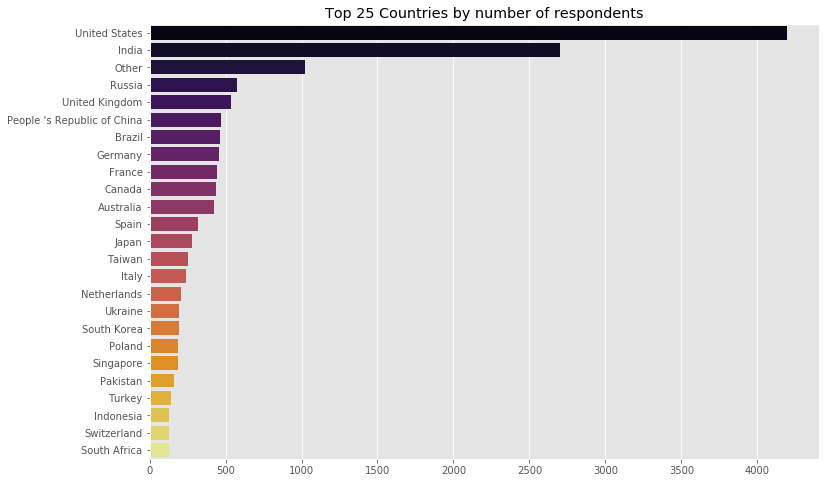

In [9]:
plt.figure(figsize=(12,8))
cnt_country = mc_responses["Country"].value_counts()[:25].to_frame()
sns.barplot(cnt_country['Country'],cnt_country.index,palette='inferno');
plt.title('Top 25 Countries by number of respondents');
plt.xlabel('');

In [149]:
cnt_country['Country'].sort_values(ascending=True)

South Africa                    127
Switzerland                     129
Indonesia                       131
Turkey                          144
Pakistan                        161
Singapore                       184
Poland                          184
South Korea                     194
Ukraine                         196
Netherlands                     205
Italy                           238
Taiwan                          254
Japan                           277
Spain                           320
Australia                       421
Canada                          440
France                          442
Germany                         460
Brazil                          465
People 's Republic of China     471
United Kingdom                  535
Russia                          578
Other                          1023
India                          2704
United States                  4197
Name: Country, dtype: int64

## compensation related

In [10]:
c_rates.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
mc_responses['CompensationAmount']=mc_responses['CompensationAmount'].str.replace(',','')
mc_responses['CompensationAmount']=mc_responses['CompensationAmount'].str.replace('-','')

In [12]:
salary=mc_responses[['CompensationAmount','CompensationCurrency','GenderSelect','Country','CurrentJobTitleSelect']].dropna()
salary=salary.merge(c_rates,left_on='CompensationCurrency',right_on='originCountry',how='left')
salary['Salary']=pd.to_numeric(salary['CompensationAmount'])*salary['exchangeRate']
print('Maximum Salary is USD $',salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $',salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $',salary['Salary'].dropna().astype(int).median())

Maximum Salary is USD $ 208999999
Minimum Salary is USD $ -2147483648
Median Salary is USD $ 53812.0


## salary dist

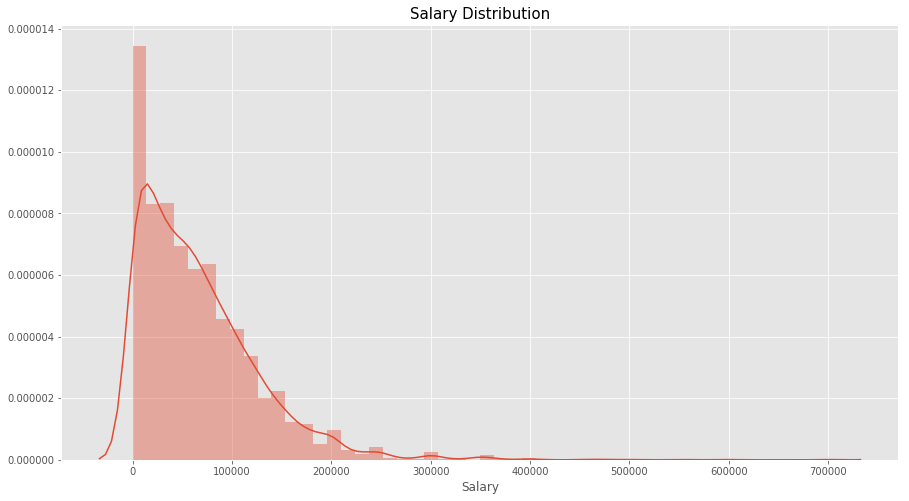

In [13]:
plt.subplots(figsize=(15,8))
salary=salary[salary['Salary']<1000000]
sns.distplot(salary['Salary'])
plt.title('Salary Distribution',size=15)
plt.show()

## compensation by country

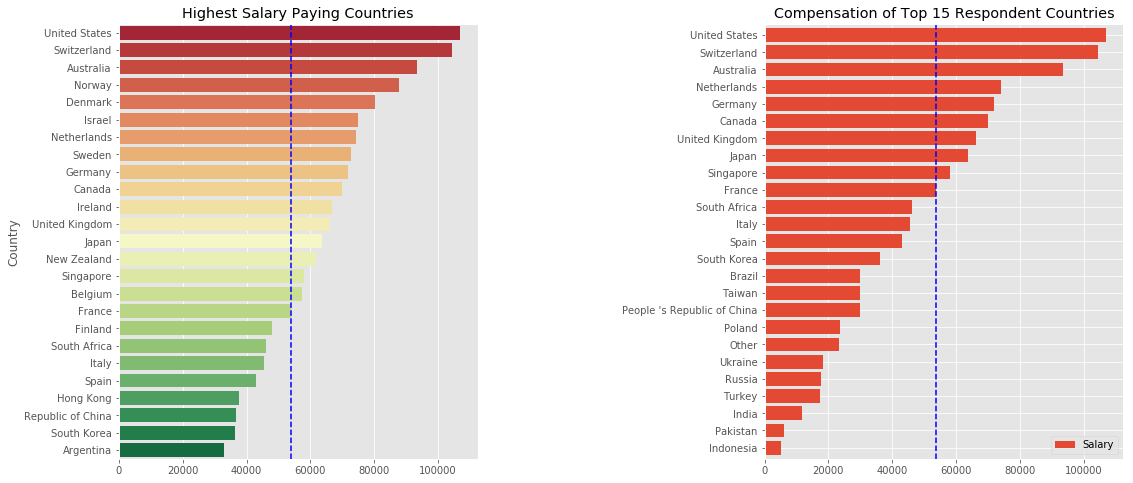

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sal_coun=salary.groupby('Country')['Salary'].median().sort_values(ascending=False)[:25].to_frame()
sns.barplot('Salary',sal_coun.index,data=sal_coun,palette='RdYlGn',ax=ax[0])
ax[0].axvline(salary['Salary'].median(),linestyle='dashed',color="blue")
ax[0].set_title('Highest Salary Paying Countries')
ax[0].set_xlabel('')
max_coun=salary.groupby('Country')['Salary'].median().to_frame()
max_coun=max_coun[max_coun.index.isin(cnt_country.index)]
max_coun.sort_values(by='Salary',ascending=True).plot.barh(width=0.8,ax=ax[1],color=sns.color_palette('RdYlGn'))
ax[1].axvline(salary['Salary'].median(),linestyle='dashed',color="blue")
ax[1].set_title('Compensation of Top 15 Respondent Countries')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()


In [146]:
max_coun

,Salary
Country,
Australia,93469.1150
Brazil,30000.0000
Canada,70013.4800
France,53812.1700
Germany,71749.5600
India,11715.0000
Indonesia,5092.0000
Italy,45441.3880
Japan,63756.0000


## salary by gender

In [15]:
cnt_gender

Male                                                 13610
Female                                                2778
A different identity                                   159
Non-binary, genderqueer, or gender non-conforming       74
Name: GenderSelect, dtype: int64

In [16]:
male_salary=salary[salary['GenderSelect']=="Male"]
female_salary=salary[salary['GenderSelect']=="Female"]
diff_salary=salary[salary['GenderSelect']=="A different identity"]
rem_salary=salary[salary['GenderSelect']=="Non-binary, genderqueer, or gender non-conforming"]

ys=[male_salary.Salary.values,female_salary.Salary.values,diff_salary.Salary.values,rem_salary.Salary.values]
names=['Male','Female','A different identity','Non-binary']
colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)']

trace = []

for i in range(4):
    trace.append ( 
        go.Box(
            y=ys[i],
            name=names[i],
            marker = dict(
                color=colors[i],
            )
        )
    )
layout = go.Layout(
    title='Salary wrt Gender'
)

fig = go.Figure(data=trace, layout=layout)
py.iplot(fig, filename="salary_wrt_gender")

## Age distribution

In [17]:
x=mc_responses[mc_responses['Age']<=80].Age.values
trace=go.Histogram(x=x,xbins=dict(start=np.min(x), size=(np.max(x)-np.min(x))/40, end=np.max(x)))
layout = go.Layout(
    title='Age Distribution'
)

fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig, filename="Age_Dst")

In [147]:
ys=[mc_responses['Age'].values]
names=['Age']
colors = ['rgba(93, 164, 214, 0.5)']

trace = []

for i in range(len(ys)):
    trace.append ( 
        go.Box(
            y=ys[i],
            name=names[i],
            marker = dict(
                color=colors[i],
            )
        )
    )
layout = go.Layout(
    title='Age Boxplot'
)

fig = go.Figure(data=trace, layout=layout)
py.iplot(fig, filename="age_bxplot")

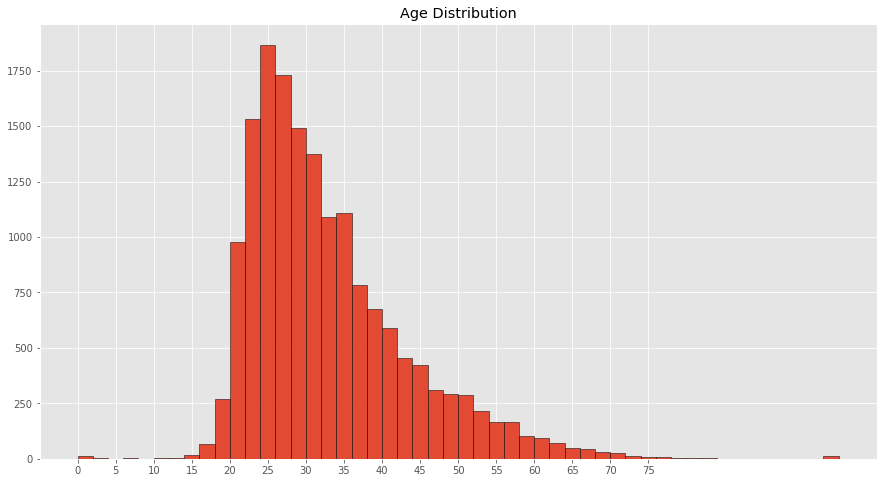

In [18]:
plt.subplots(figsize=(15,8))
mc_responses['Age'].hist(bins=50,edgecolor='black')
plt.xticks(list(range(0,80,5)))
plt.title('Age Distribution')
plt.show() 

## Profession and Major

In [19]:
cnt_profession = mc_responses["CurrentJobTitleSelect"].value_counts().sort_values(ascending=True)
cnt_major= mc_responses["MajorSelect"].value_counts().sort_values(ascending=True)
trace1 = go.Bar(x=cnt_profession.values,y=cnt_profession.index,marker=dict(
        color = cnt_profession.values,),orientation="h")
trace2=go.Bar(x=cnt_major.values,y=cnt_major.index,marker=dict(
        color = cnt_major.values,),orientation="h")
layout = go.Layout(
    title='Profession',
   )

fig = tls.make_subplots(rows=2, cols=1, subplot_titles=('Profession', 'Major'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=800, width=1000, title='Top 15 Profession' +' & Top 15 Major',margin=go.Margin(
    l=400,
))
py.iplot(fig, filename='make-subplots-multiple-with-titles')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



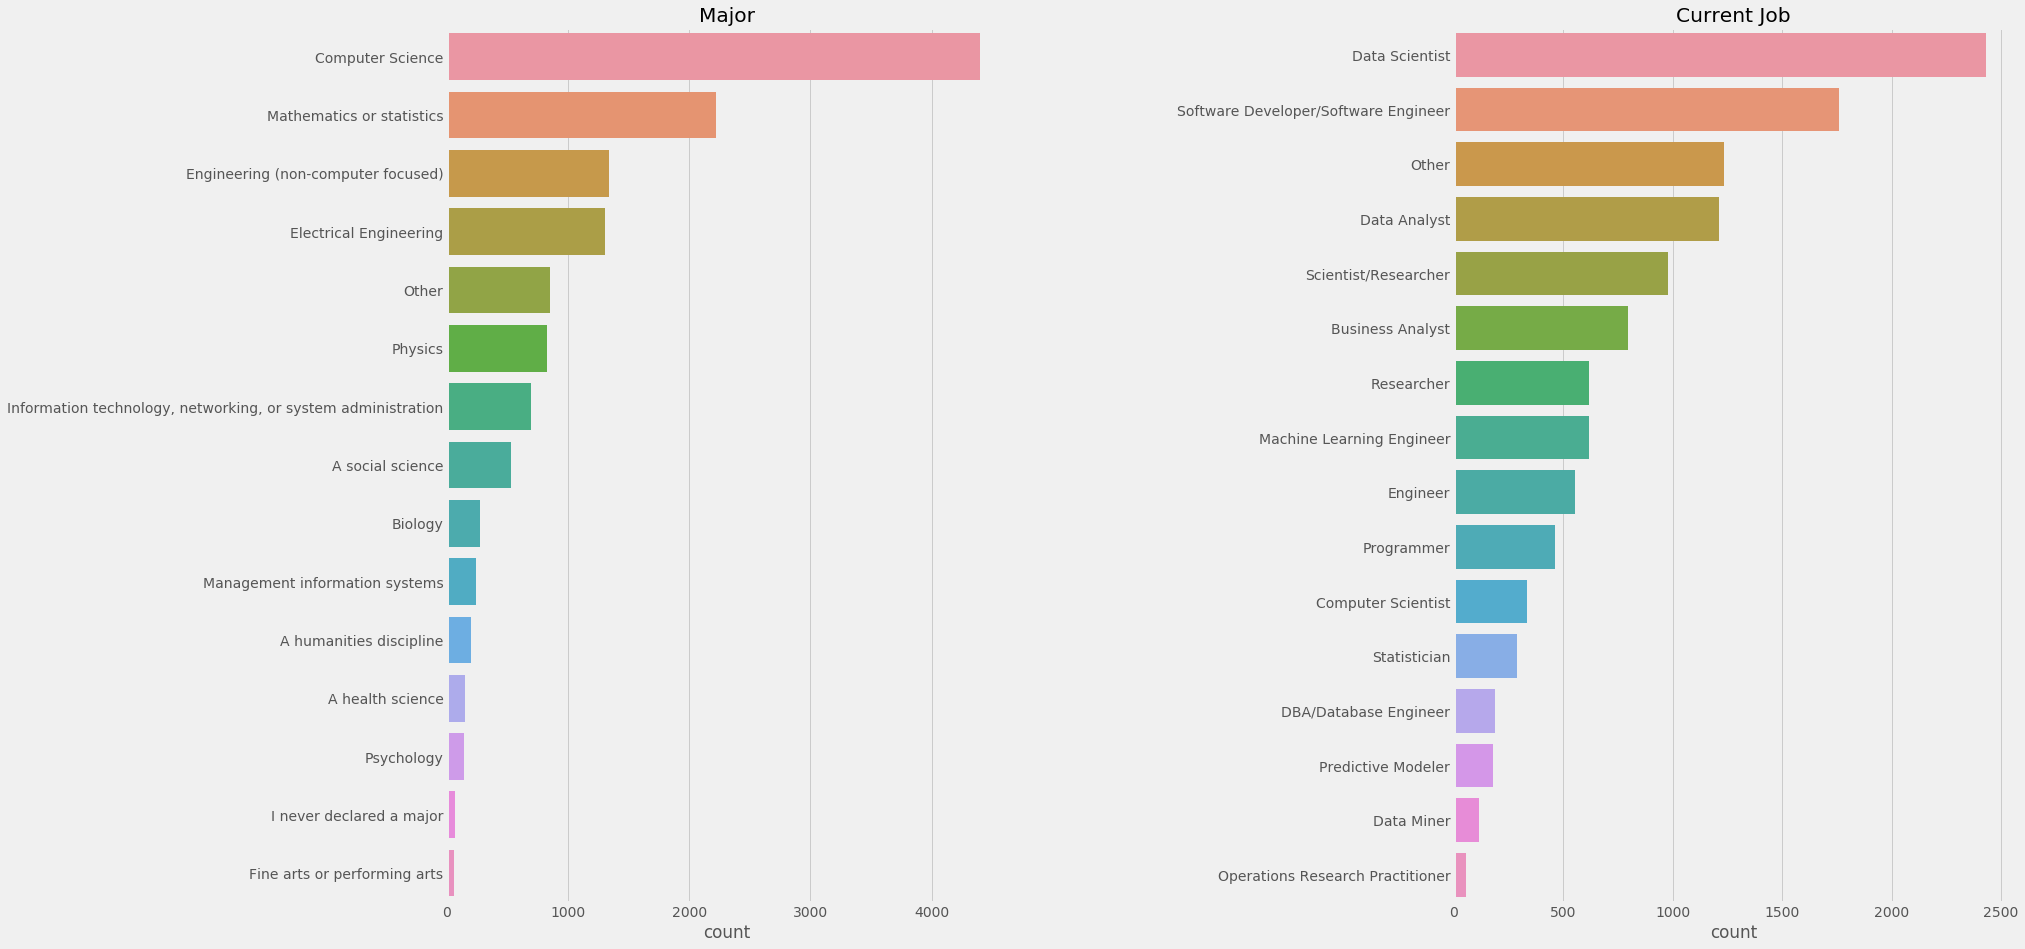

In [20]:
plt.style.use('fivethirtyeight')
f,ax=plt.subplots(1,2,figsize=(25,15))
sns.countplot(y=mc_responses['MajorSelect'],ax=ax[0],order=mc_responses['MajorSelect'].value_counts().index)
ax[0].set_title('Major')
ax[0].set_ylabel('')
sns.countplot(y=mc_responses['CurrentJobTitleSelect'],ax=ax[1],order=mc_responses['CurrentJobTitleSelect'].value_counts().index)
ax[1].set_title('Current Job')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

In [21]:
sal_job=salary.groupby('CurrentJobTitleSelect')['Salary'].median().to_frame().sort_values(by='Salary',ascending=True)

trace = go.Bar(y=sal_job.index.values,x=sal_job.Salary.values,marker=dict(
        color = sal_job.Salary.values,),orientation="h")

layout = go.Layout(
    title='Job Title wrt Salary',margin=go.Margin(l=300)
)
data=[trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="salary_wrt_job")

In [22]:
skills=mc_responses['MLSkillsSelect'].str.split(',')
skills_set=[]
for i in skills.dropna():
    skills_set.extend(i)
plt1=pd.Series(skills_set).value_counts().sort_values(ascending=True).to_frame()

tech=mc_responses['MLTechniquesSelect'].str.split(',')
techniques=[]
for i in tech.dropna():
    techniques.extend(i)
plt2=pd.Series(techniques).value_counts().sort_values(ascending=True).to_frame()

trace1 = go.Bar(x=plt1[0].values,y=plt1.index.values,marker=dict(
        color = plt1[0].values,),orientation="h")
trace2=go.Bar(x=plt2[0].values,y=plt2.index.values,marker=dict(
        color = plt2[0].values,),orientation="h")


fig = tls.make_subplots(rows=2, cols=1, subplot_titles=('Machine Learning Skills', 'Machine Learning Techniques'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=800, width=1000, title='ML Skills' +' vs. ML Techniques',margin=go.Margin(l=400,))
py.iplot(fig, filename='mls-mlt')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



In [23]:
skills=mc_responses['MLMethodNextYearSelect'].str.split(',')
skills_set=[]
for i in skills.dropna():
    skills_set.extend(i)
plt1=pd.Series(skills_set).value_counts().sort_values(ascending=True).to_frame()

tech=mc_responses['MLToolNextYearSelect'].str.split(',')
techniques=[]
for i in tech.dropna():
    techniques.extend(i)
plt2=pd.Series(techniques).value_counts().sort_values(ascending=True).to_frame()

trace1 = go.Bar(x=plt1[0].values,y=plt1.index.values,marker=dict(
        color = plt1[0].values,),orientation="h")
trace2=go.Bar(x=plt2[0].values,y=plt2.index.values,marker=dict(
        color = plt2[0].values,),orientation="h")


fig = tls.make_subplots(rows=2, cols=1, subplot_titles=('Machine Learning Methods', 'Machine Learning Tools'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=1400, width=1000, title='ML Methods' +' vs. ML Tools',margin=go.Margin(l=400,))
py.iplot(fig, filename='mlm-mlt')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



In [24]:
learning=mc_responses['LearningPlatformSelect'].str.split(',')
platform=[]
for i in learning.dropna():
    platform.extend(i)
plt1=pd.Series(platform).value_counts().sort_values(ascending=True).to_frame()

trace = go.Bar(y=plt1.index.values,x=plt1[0].values,marker=dict(
        color = plt1.values,),orientation="h")

layout = go.Layout(
    title='Most Popular learning platforms',margin=go.Margin(l=300)
)
data=[trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="learning")

In [25]:
hard=mc_responses['HardwarePersonalProjectsSelect'].str.split(',')
hardware=[]
for i in hard.dropna():
    hardware.extend(i)
plt1=pd.Series(hardware).value_counts().sort_values(ascending=True).to_frame()

trace = go.Bar(y=plt1.index.values,x=plt1[0].values,marker=dict(
        color = plt1.values,),orientation="h")

layout = go.Layout(
    title='Most Popular hardware',margin=go.Margin(l=300)
)
data=[trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="hardware")

In [26]:
data=mc_responses['PublicDatasetsSelect'].str.split(',')
dataset=[]
for i in data.dropna():
    dataset.extend(i)

datas=pd.Series(dataset).value_counts()

labels = (np.array(datas.index))
sizes = (np.array((datas.values / datas.values.sum())*100))

trace = go.Pie(labels=['Kaggle or data.world','Google Search','Univ or NPR','own data','GItHub','Gov Website','Other'], values=sizes)
layout = go.Layout(
    title='Dataset Aval distribution'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="data_dist")

In [27]:
code=mc_responses['WorkCodeSharing'].str.split(',')
code_share=[]
for i in code.dropna():
    code_share.extend(i)

codeshare=pd.Series(code_share).value_counts()

labels = (np.array(codeshare.index))
sizes = (np.array((codeshare.values / codeshare.values.sum())*100))

trace = go.Pie(labels=['Git','Generic non-cloud','Generic cloud','Bitbucket','Subversion','Other','Mercurical'], values=sizes)
layout = go.Layout(
    title='Code Sharing platform distribution'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="data_code")

In [28]:
challenge=mc_responses['WorkChallengesSelect'].str.split(',')
challenges=[]
for i in challenge.dropna():
    challenges.extend(i)
plt1=pd.Series(challenges).value_counts().sort_values(ascending=True).to_frame()

trace = go.Bar(y=plt1.index.values,x=plt1[0].values,marker=dict(
        color = plt1[0].values,),orientation="h")

layout = go.Layout(
    title='Challenges in Data Science',margin=go.Margin(l=500)
)
data=[trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="hardware")

In [29]:
satisfy=mc_responses.copy()
satisfy['JobSatisfaction'].replace({'10 - Highly Satisfied':'10','1 - Highly Dissatisfied':'1','I prefer not to share':np.NaN},inplace=True)
satisfy.dropna(subset=['JobSatisfaction'],inplace=True)
satisfy['JobSatisfaction']=satisfy['JobSatisfaction'].astype(int)
satisfy_job=satisfy.groupby(['CurrentJobTitleSelect'])['JobSatisfaction'].mean().sort_values(ascending=True).to_frame()

In [30]:
trace = go.Bar(y=satisfy_job.index,x=satisfy_job.JobSatisfaction.values,marker=dict(
        color = satisfy_job.JobSatisfaction.values,),orientation="h")

layout = go.Layout(
    title='Job Satisfaction',margin=go.Margin(l=300)
)
data=[trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="satisfaction")

## Python vs. R

In [31]:
resp=mc_responses.dropna(subset=['WorkToolsSelect'])
resp=resp.merge(c_rates,left_on='CompensationCurrency',right_on='originCountry',how='left')
python=resp[(resp['WorkToolsSelect'].str.contains('Python'))&(~resp['WorkToolsSelect'].str.contains('R'))]
R=resp[(~resp['WorkToolsSelect'].str.contains('Python'))&(resp['WorkToolsSelect'].str.contains('R'))]
both=resp[(resp['WorkToolsSelect'].str.contains('Python'))&(resp['WorkToolsSelect'].str.contains('R'))]

In [32]:
lang=mc_responses['LanguageRecommendationSelect'].value_counts().sort_values(ascending=True)
trace = go.Bar(y=lang.index,x=lang.values,marker=dict(
        color = lang.values,),orientation="h")

layout = go.Layout(
    title='Programming Language preference',margin=go.Margin(l=300)
)
data=[trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="lang")

In [33]:
labels1=python['LanguageRecommendationSelect'].value_counts()[:5].index
sizes1=python['LanguageRecommendationSelect'].value_counts()[:5].values

labels2=R['LanguageRecommendationSelect'].value_counts()[:5].index
sizes2=R['LanguageRecommendationSelect'].value_counts()[:5].values


fig = {
  "data": [
    {
      "values": sizes1,
      "labels": labels1,
      "domain": {"x": [0, .48]},
      "name": "Language",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },     
    {
      "values": sizes2 ,
      "labels": labels2,
      "text":"CO2",
      "textposition":"inside",
      "domain": {"x": [.54, 1]},
      "name": "Language",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Language Recommended By Python and R users",
        "annotations": [
            {
                "font": {
                    "size": 30
                },
                "showarrow": False,
                "text": "Python",
                "x": 0.17,
                "y": 0.5
            },
            {
                "font": {
                    "size": 30
                },
                "showarrow": False,
                "text": "R",
                "x": 0.79,
                "y": 0.5}]}}
py.iplot(fig, filename='donut')

This is a interesting find. About 91.6% Python users recommend Python as the first language for begineers, whereas only 67.2% R users recommend R as the first language. Also 20.6% R users recommend Python but only 1.68% Python users recommend R as the first language. One thing to note is that users of both recommend the same Languages i.e SQL, Matlab and C/C++. I have only considered the Top 5 recommended languages, so the percentage will change if we consider all of them. But the difference would be just 2-3%.

In [34]:
labels1=mc_responses['JobSkillImportancePython'].value_counts().index
sizes1=mc_responses['JobSkillImportancePython'].value_counts().values

labels2=mc_responses['JobSkillImportanceR'].value_counts().index
sizes2=mc_responses['JobSkillImportanceR'].value_counts().values


fig = {
  "data": [
    {
      "values": sizes1,
      "labels": labels1,
      "domain": {"x": [0, .48]},
      "name": "Language",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },     
    {
      "values": sizes2 ,
      "labels": labels2,
      "text":"CO2",
      "textposition":"inside",
      "domain": {"x": [.54, 1]},
      "name": "Language",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Necessity of Python and R",
        "annotations": [
            {
                "font": {
                    "size": 30
                },
                "showarrow": False,
                "text": "Python",
                "x": 0.17,
                "y": 0.5
            },
            {
                "font": {
                    "size": 30
                },
                "showarrow": False,
                "text": "R",
                "x": 0.79,
                "y": 0.5}]}}
py.iplot(fig, filename='donut')

In [35]:
trace0 = go.Scatter(
    x=[1, 1.75, 2.5],
    y=[1, 1, 1],
    text=['Python users: '+str(python.shape[0]),'Both users: '+str(both.shape[0]),'R users: '+str(R.shape[0])],
    mode='text',
    textfont=dict(
        color='black',
        size=18,
        family='Arail',
    )
)

data = [trace0]

layout = {'title':"Venn Diagram for users",
    'xaxis': {
        'showticklabels': False,
        'autotick': False,
        'showgrid': False,
        'zeroline': False,
    },
    'yaxis': {
        'showticklabels': False,
        'autotick': False,
        'showgrid': False,
        'zeroline': False,
    },
    'shapes': [
        {
            'opacity': 0.3,
            'xref': 'x',
            'yref': 'y',
            'fillcolor': 'blue',
            'x0': 0,
            'y0': 0,
            'x1': 2,
            'y1': 2,
            'type': 'circle',
            'line': {
                'color': 'blue',
            },
        },
        {
            'opacity': 0.3,
            'xref': 'x',
            'yref': 'y',
            'fillcolor': 'gray',
            'x0': 1.5,
            'y0': 0,
            'x1': 3.5,
            'y1': 2,
            'type': 'circle',
            'line': {
                'color': 'gray',
            },
        }
    ],
    'margin': {
        'l': 20,
        'r': 20,
        'b': 100
    },
    'height': 600,
    'width': 800,
}
fig = {
    'data': data,
    'layout': layout,
}
py.iplot(fig, filename='venn-diagram')

In [36]:
users=pd.Series([python.shape[0],R.shape[0],both.shape[0]],index=['Python','R','Both'])
trace = go.Bar(x=users.index,y=users.values,marker=dict(
        color = users.values,))

layout = go.Layout(
    title='Number of Users wrt programming Language',margin=go.Margin(l=100)
)
data=[trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="num_users")


In [37]:
py_sal=(pd.to_numeric(python['CompensationAmount'].dropna())*python['exchangeRate']).dropna()
py_sal=py_sal[py_sal<1000000]
R_sal=(pd.to_numeric(R['CompensationAmount'].dropna())*R['exchangeRate']).dropna()
R_sal=R_sal[R_sal<1000000]
both_sal=(pd.to_numeric(both['CompensationAmount'].dropna())*both['exchangeRate']).dropna()
both_sal=both_sal[both_sal<1000000]
trying=pd.DataFrame([py_sal,R_sal,both_sal])
trying=trying.transpose()
trying.columns=['Python','R','Both']
print('Median Salary For Individual using Python:',trying['Python'].median())
print('Median Salary For Individual using R:',trying['R'].median())
print('Median Salary For Individual knowing both languages:',trying['Both'].median())

Median Salary For Individual using Python: 48725.600000000006
Median Salary For Individual using R: 48421.99999999999
Median Salary For Individual knowing both languages: 59791.3


In [38]:
ys=[trying.Python.values,trying.R.values,trying.Both.values]
names=['Python','R','Both']
colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)']

trace = []

for i in range(3):
    trace.append ( 
        go.Box(
            y=ys[i],
            name=names[i],
            marker = dict(
                color=colors[i],
            )
        )
    )
layout = go.Layout(
    title='Salary wrt programming'
)

fig = go.Figure(data=trace, layout=layout)
py.iplot(fig, filename="salary_wrt_programming")

In [39]:
py1=python.copy()
r=R.copy()
py1['WorkToolsSelect']='Python'
r['WorkToolsSelect']='R'
r_vs_py=pd.concat([py1,r])
r_vs_py=r_vs_py.groupby(['CurrentJobTitleSelect','WorkToolsSelect'])['Age'].count().to_frame().reset_index()

In [40]:
trace1 = go.Bar(
    y=r_vs_py['CurrentJobTitleSelect'].unique().tolist(),
    x=r_vs_py[r_vs_py['WorkToolsSelect']=='Python'].Age.values,orientation="h",
    name='Python'
)
trace2 = go.Bar(
    y=r_vs_py['CurrentJobTitleSelect'].unique().tolist(),
    x=r_vs_py[r_vs_py['WorkToolsSelect']=='R'].Age.values,orientation="h",
    name='R'
)

data = [trace1, trace2]
layout = go.Layout(title='Work Tools Select by Profession',
    barmode='group',margin=go.Margin(l=250)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [41]:
r_vs_py=pd.concat([py1,r])
r_vs_py=r_vs_py.groupby(['JobFunctionSelect','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
trace1 = go.Bar(
    y=r_vs_py['JobFunctionSelect'].unique().tolist(),
    x=r_vs_py[r_vs_py['WorkToolsSelect']=='Python'].Age.values,orientation="h",
    name='Python'
)
trace2 = go.Bar(
    y=r_vs_py['JobFunctionSelect'].unique().tolist(),
    x=r_vs_py[r_vs_py['WorkToolsSelect']=='R'].Age.values,orientation="h",
    name='R'
)

data = [trace1, trace2]
layout = go.Layout(title='Work Tools Select by Job description',
    barmode='group',margin=go.Margin(l=650)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [42]:
r_vs_py=pd.concat([py1,r])
r_vs_py=r_vs_py.groupby(['Tenure','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
trace1 = go.Bar(
    y=r_vs_py['Tenure'].unique().tolist(),
    x=r_vs_py[r_vs_py['WorkToolsSelect']=='Python'].Age.values,orientation="h",
    name='Python'
)
trace2 = go.Bar(
    y=r_vs_py['Tenure'].unique().tolist(),
    x=r_vs_py[r_vs_py['WorkToolsSelect']=='R'].Age.values,orientation="h",
    name='R'
)

data = [trace1, trace2]
layout = go.Layout(title='Work Tools Select by Job Tenure',
    barmode='group',margin=go.Margin(l=250)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [43]:
r_vs_py=pd.concat([py1,r])
r_vs_py=r_vs_py.groupby(['EmployerIndustry','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
trace1 = go.Bar(
    y=r_vs_py['EmployerIndustry'].unique().tolist(),
    x=r_vs_py[r_vs_py['WorkToolsSelect']=='Python'].Age.values,orientation="h",
    name='Python'
)
trace2 = go.Bar(
    y=r_vs_py['EmployerIndustry'].unique().tolist(),
    x=r_vs_py[r_vs_py['WorkToolsSelect']=='R'].Age.values,orientation="h",
    name='R'
)

data = [trace1, trace2]
layout = go.Layout(title='Work Tools Select by Job Tenure',
    barmode='group',margin=go.Margin(l=250)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

## Common Tools with Python and R

In [44]:
py_comp=python['WorkToolsSelect'].str.split(',')
py_comp1=[]
for i in py_comp:
    py_comp1.extend(i)

plt1=pd.Series(py_comp1).value_counts()[1:20].sort_values(ascending=True).to_frame()

R_comp=R['WorkToolsSelect'].str.split(',')
R_comp1=[]
for i in R_comp:
    R_comp1.extend(i)
plt2=pd.Series(R_comp1).value_counts()[1:20].sort_values(ascending=True).to_frame()

trace1 = go.Bar(x=plt1[0].values,y=plt1.index.values,marker=dict(
        color = plt1[0].values,),orientation="h")
trace2=go.Bar(x=plt2[0].values,y=plt2.index.values,marker=dict(
        color = plt2[0].values,),orientation="h")


fig = tls.make_subplots(rows=2, cols=1, subplot_titles=('Commonly used tools with Python', 'Commonly used tools with R'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=1400, width=1000, title='Common tools with Python and R',margin=go.Margin(l=300,))
py.iplot(fig, filename='mlm-mlt')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



## Asking the Data Scientists

In [45]:
mc_responses['DataScienceIdentitySelect'].value_counts()

No                        5314
Yes                       4257
Sort of (Explain more)    3100
Name: DataScienceIdentitySelect, dtype: int64

In [46]:
scientist=mc_responses[mc_responses['DataScienceIdentitySelect']=='Yes']
plt1=scientist['CurrentJobTitleSelect'].value_counts().sort_values(ascending=True)


trace = go.Bar(y=plt1.index,x=plt1.values,marker=dict(
        color = plt1.values,),orientation="h")

layout = go.Layout(
    title='Job Titles for Datasci engg',margin=go.Margin(l=300)
)
data=[trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="job_datasci")

In [47]:
true=mc_responses[mc_responses['CurrentJobTitleSelect']=='Data Scientist']

In [48]:
scientist=pd.concat([scientist,true])
scientist['CurrentJobTitleSelect'].shape[0]

6690

In [49]:
plt1=scientist['Country'].value_counts()[:15].sort_values(ascending=True)


trace = go.Bar(y=plt1.index,x=plt1.values,marker=dict(
        color = plt1.values,),orientation="h")

layout = go.Layout(
    title='Countries with data Scientists',margin=go.Margin(l=200)
)
data=[trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="country_datasci")

In [50]:
plt1=scientist['EmploymentStatus'].value_counts().sort_values(ascending=True)
plt2=scientist['FormalEducation'].value_counts().sort_values(ascending=True)
trace1 = go.Bar(x=plt1.values,y=plt1.index,marker=dict(
        color = plt1.values,),orientation="h")
trace2=go.Bar(x=plt2.values,y=plt2.index,marker=dict(
        color = plt2.values,),orientation="h")


fig = tls.make_subplots(rows=2, cols=1, subplot_titles=('Employment Status', 'Formal Education'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=800, width=1000, title='Users Employmet & Education Stats',margin=go.Margin(l=450,))
py.iplot(fig, filename='mlm-mlt')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



In [51]:
comp_edu=scientist.merge(salary,left_index=True,right_index=True,how='left')
comp_edu=comp_edu[['FormalEducation','Salary']]

names=comp_edu.FormalEducation.unique().tolist()


trace = []

for i in range(len(names)):
    trace.append ( 
        go.Box(
            y=comp_edu[comp_edu['FormalEducation']==names[i]].Salary.values,
            name=names[i],
        )
    )
layout = go.Layout(showlegend=False,
    title='Salary wrt Education',margin=go.Margin(b=200)
)

fig = go.Figure(data=trace, layout=layout)
py.iplot(fig, filename="salary_wrt_education")

## Previous job and Salary Change

In [54]:
past=scientist['PastJobTitlesSelect'].str.split(',')
past_job=[]
for i in past.dropna():
    past_job.extend(i)
plt1=pd.Series(past_job).value_counts().sort_values(ascending=True).to_frame()
sal=scientist['SalaryChange'].str.split(',')
sal_change=[]
for i in sal.dropna():
    sal_change.extend(i)
    
plt2=pd.Series(sal_change).value_counts().sort_values(ascending=True).to_frame()


trace1 = go.Bar(x=plt1[0].values,y=plt1.index.values,marker=dict(
        color = plt1[0].values,),orientation="h")
trace2=go.Bar(x=plt2[0].values,y=plt2.index.values,marker=dict(
        color = plt2[0].values,),orientation="h")


fig = tls.make_subplots(rows=2, cols=1, subplot_titles=('Previous Job', 'Salary Change'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=900, width=1000, title='Previous Job with Salary change to the current',margin=go.Margin(l=300,))
py.iplot(fig, filename='mlm-mlt')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



In [55]:
tools=scientist['WorkToolsSelect'].str.split(',')
tools_work=[]
for i in tools.dropna():
    tools_work.extend(i)

plt1=pd.Series(tools_work).value_counts()[:15].sort_values(ascending=True)
trace = go.Bar(y=plt1.index,x=plt1.values,marker=dict(
        color = plt1.values,),orientation="h")

layout = go.Layout(
    title='Tools used at work',margin=go.Margin(l=200)
)
data=[trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="country_datasci")

## Where did they learn from?

In [56]:
course=scientist['CoursePlatformSelect'].str.split(',')
course_plat=[]
for i in course.dropna():
    course_plat.extend(i)
course_plat=pd.Series(course_plat).value_counts()
blogs=scientist['BlogsPodcastsNewslettersSelect'].str.split(',')
blogs_fam=[]
for i in blogs.dropna():
    blogs_fam.extend(i)
blogs_fam=pd.Series(blogs_fam).value_counts()
labels1=course_plat.index
sizes1=course_plat.values

labels2=blogs_fam[:5].index
sizes2=blogs_fam[:5].values


fig = {
  "data": [
    {
      "values": sizes1,
      "labels": labels1,
      "domain": {"x": [0, .48]},
      "name": "MOOC",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },     
    {
      "values": sizes2 ,
      "labels": labels2,
      "text":"CO2",
      "textposition":"inside",
      "domain": {"x": [.54, 1]},
      "name": "Blog",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Blogs and Online Platforms",
        "showlegend":True,
        "annotations": [
            {
                "font": {
                    "size": 12
                },
                "showarrow": False,
                "text": "MOOC's",
                "x": 0.18,
                "y": 0.5
            },
            {
                "font": {
                    "size": 12
                },
                "showarrow": False,
                "text": "BLOGS",
                "x": 0.83,
                "y": 0.5}]}}
py.iplot(fig, filename='donut')

## Time Spent on tasks

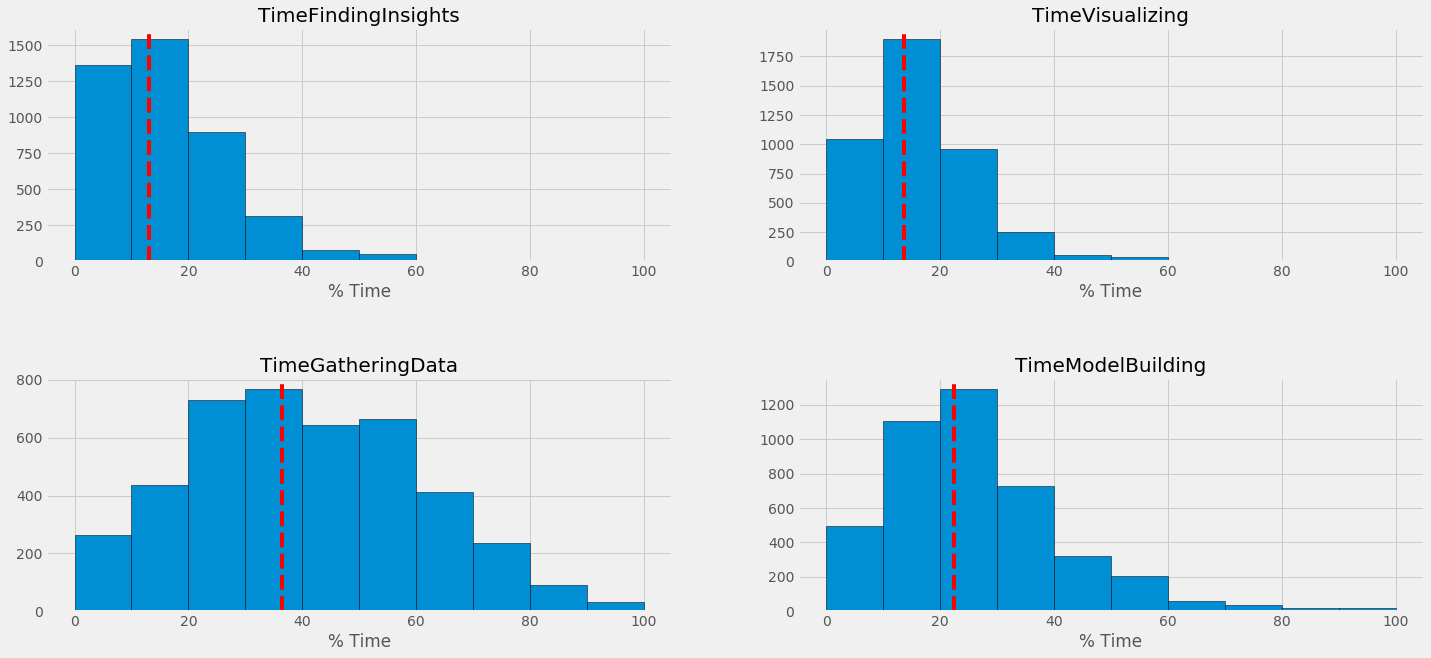

In [57]:
import itertools
plt.subplots(figsize=(22,10))
time_spent=['TimeFindingInsights','TimeVisualizing','TimeGatheringData','TimeModelBuilding']
length=len(time_spent)
for i,j in itertools.zip_longest(time_spent,range(length)):
    plt.subplot((length/2),2,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    scientist[i].hist(bins=10,edgecolor='black')
    plt.axvline(scientist[i].mean(),linestyle='dashed',color='r')
    plt.title(i,size=20)
    plt.xlabel('% Time')
plt.show()

In [63]:
x1=scientist['TimeFindingInsights'].values
x2=scientist['TimeVisualizing'].values
x3=scientist['TimeGatheringData'].values
x4=scientist['TimeModelBuilding'].values

trace1 = go.Histogram(x=x1,xbins=dict(start=np.min(x), size=(100-np.min(x))/10, end=100))
trace2=go.Histogram(x=x2,xbins=dict(start=np.min(x), size=(100-np.min(x))/10, end=100))
trace3 = go.Histogram(x=x3,xbins=dict(start=np.min(x), size=(100-np.min(x))/10, end=100))
trace4=go.Histogram(x=x4,xbins=dict(start=np.min(x), size=(100-np.min(x))/10, end=100))

fig = tls.make_subplots(rows=2, cols=2, subplot_titles=('TimeFindingInsights', 'TimeVisualizing','TimeGatheringData','TimeModelBuilding'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)

fig['layout'].update(height=900, width=1000, title='Time Management',margin=go.Margin(l=50,))


py.iplot(fig, filename='mlm-mlt')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



In [76]:

x1=scientist['WorkToolsFrequencyAmazonML'].value_counts()
x2=scientist['WorkToolsFrequencyAWS'].value_counts()
x3=scientist['WorkToolsFrequencyCloudera'].value_counts()
x4=scientist['WorkToolsFrequencyHadoop'].value_counts()
x5=scientist['WorkToolsFrequencyAzure'].value_counts()

trace1 = go.Bar(x=x1.index,y=x1.values,marker=dict(color = x1.values,))
trace2 = go.Bar(x=x2.index,y=x2.values,marker=dict(color = x2.values,))
trace3 = go.Bar(x=x3.index,y=x3.values,marker=dict(color = x3.values,))
trace4 = go.Bar(x=x4.index,y=x4.values,marker=dict(color = x4.values,))
trace5 = go.Bar(x=x5.index,y=x5.values,marker=dict(color = x5.values,))



fig = tls.make_subplots(rows=2, cols=3, subplot_titles=('WorkToolsFrequencyAmazonML','WorkToolsFrequencyAWS','WorkToolsFrequencyCloudera','WorkToolsFrequencyHadoop','WorkToolsFrequencyAzure'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 2)
fig['layout'].update(height=700, width=1000, title='Most Popular platform',margin=go.Margin(l=50,))
py.iplot(fig, filename='mlm-mlt')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]
[ (2,1) x4,y4 ]  [ (2,2) x5,y5 ]  [ (2,3) x6,y6 ]



In [72]:
plt1=scientist['JobSkillImportanceVisualizations'].value_counts()


trace = go.Bar(x=plt1.index,y=plt1.values,marker=dict(color = plt1.values,),)

layout = go.Layout(
    title="Job Importance For Visuals",margin=go.Margin(l=200)
)
data=[trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="country_datasci")

In [75]:
labels1=scientist['WorkDataVisualizations'].value_counts().index
sizes1=scientist['WorkDataVisualizations'].value_counts().values

fig = {
  "data": [
    {
      "values": sizes1,
      "labels": labels1,
      "domain": {"x": [0, 1]},
      "name": "",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },     
    ],
  "layout": {
        "title":"Use of visualizations in projects",
        "annotations": [
            {
                "font": {
                    "size": 30
                },
                "showarrow": False,
                "text": "Viz.",
                "x": 0.5,
                "y": 0.5
            },]}}
py.iplot(fig, filename='donut')

In [78]:
x1=scientist['WorkToolsFrequencyQlik'].value_counts()
x2=scientist['WorkToolsFrequencySAPBusinessObjects'].value_counts()
x3=scientist['WorkToolsFrequencyTableau'].value_counts()
x4=scientist['WorkToolsFrequencyTIBCO'].value_counts()
x5=scientist['WorkToolsFrequencyAngoss'].value_counts()
x6=scientist['WorkToolsFrequencyIBMCognos'].value_counts()
x7=scientist['WorkToolsFrequencyKNIMECommercial'].value_counts()
x8=scientist['WorkToolsFrequencyExcel'].value_counts()

trace1 = go.Bar(x=x1.index,y=x1.values,marker=dict(color = x1.values,))
trace2 = go.Bar(x=x2.index,y=x2.values,marker=dict(color = x2.values,))
trace3 = go.Bar(x=x3.index,y=x3.values,marker=dict(color = x3.values,))
trace4 = go.Bar(x=x4.index,y=x4.values,marker=dict(color = x4.values,))
trace5 = go.Bar(x=x5.index,y=x5.values,marker=dict(color = x5.values,))
trace6 = go.Bar(x=x6.index,y=x6.values,marker=dict(color = x6.values,))
trace7 = go.Bar(x=x7.index,y=x7.values,marker=dict(color = x7.values,))
trace8 = go.Bar(x=x8.index,y=x8.values,marker=dict(color = x8.values,))


fig = tls.make_subplots(rows=3, cols=3, subplot_titles=('WorkToolsFrequencyQlik','WorkToolsFrequencySAPBusinessObjects','WorkToolsFrequencyTableau','WorkToolsFrequencyTIBCO','WorkToolsFrequencyAngoss','WorkToolsFrequencyIBMCognos','WorkToolsFrequencyKNIMECommercial','WorkToolsFrequencyExcel'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 2)
fig.append_trace(trace6, 2, 3)
fig.append_trace(trace7, 3, 1)
fig.append_trace(trace8, 3, 2)



fig['layout'].update(height=900, width=1000, title='Most Popular BI Tools',margin=go.Margin(l=50,))
py.iplot(fig, filename='mlm-mlt')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]
[ (2,1) x4,y4 ]  [ (2,2) x5,y5 ]  [ (2,3) x6,y6 ]
[ (3,1) x7,y7 ]  [ (3,2) x8,y8 ]  [ (3,3) x9,y9 ]



## knowledge and Understanding

In [86]:
x1=scientist['AlgorithmUnderstandingLevel'].value_counts().sort_values(ascending=True)
x2=scientist['JobSkillImportanceStats'].value_counts()


trace1 = go.Bar(y=x1.index,x=x1.values,marker=dict(color = x1.values,),orientation="h")
trace2 = go.Bar(x=x2.index,y=x2.values,marker=dict(color = x2.values,))

fig = tls.make_subplots(rows=2, cols=1, subplot_titles=('Algorithm Understanding Level','Knowledge of Stats'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=700, width=1000, title='Most Popular BI Tools',margin=go.Margin(l=450,))
py.iplot(fig, filename='mlm-mlt')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



In [101]:
labels1=scientist['LearningPlatformUsefulnessBlogs'].value_counts().index
sizes1=scientist['LearningPlatformUsefulnessBlogs'].value_counts().values
labels2=scientist['LearningPlatformUsefulnessCollege'].value_counts().index
sizes2=scientist['LearningPlatformUsefulnessCollege'].value_counts().values
labels3=scientist['LearningPlatformUsefulnessCompany'].value_counts().index
sizes3=scientist['LearningPlatformUsefulnessCompany'].value_counts().values

fig = {
  "data": [
    {
      "values": sizes1,
      "labels": labels1,
      "domain": {"x": [0, 0.3]},
      "name": "",
      "hoverinfo":"label+percent+name",
      "hole": .6,
      "type": "pie"
    },
    
    {
      "values": sizes2,
      "labels": labels2,
      "domain": {"x": [0.33, 0.63]},
      "name": "",
      "hoverinfo":"label+percent+name",
      "hole": .6,
      "type": "pie"
    },
      
    {
      "values": sizes3,
      "labels": labels3,
      "domain": {"x": [0.7, 1]},
      "name": "",
      "hoverinfo":"label+percent+name",
      "hole": .6,
      "type": "pie"
    }, 
      
    ],
  "layout": {
        "title":"Learning from various sources",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Blogs",
                "x": 0.10,
                "y": 0.5
            },
         {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "College",
                "x": 0.48,
                "y": 0.5
            },
         {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Company",
                "x": 0.925,
                "y": 0.5
            }]}}
py.iplot(fig, filename='donut')

In [104]:
labels4=scientist['LearningPlatformUsefulnessKaggle'].value_counts().index
sizes4=scientist['LearningPlatformUsefulnessKaggle'].value_counts().values
labels5=scientist['LearningPlatformUsefulnessCourses'].value_counts().index
sizes5=scientist['LearningPlatformUsefulnessCourses'].value_counts().values
labels6=scientist['LearningPlatformUsefulnessProjects'].value_counts().index
sizes6=scientist['LearningPlatformUsefulnessProjects'].value_counts().values

fig = {
  "data": [
    {
      "values": sizes4,
      "labels": labels4,
      "domain": {"x": [0, 0.3]},
      "name": "",
      "hoverinfo":"label+percent+name",
      "hole": .6,
      "type": "pie"
    },
    
    {
      "values": sizes5,
      "labels": labels5,
      "domain": {"x": [0.34, 0.63]},
      "name": "",
      "hoverinfo":"label+percent+name",
      "hole": .6,
      "type": "pie"
    },
      
    {
      "values": sizes6,
      "labels": labels6,
      "domain": {"x": [0.67, 1]},
      "name": "",
      "hoverinfo":"label+percent+name",
      "hole": .6,
      "type": "pie"
    }, 
      
    ],
  "layout": {
        "title":"Learning from various sources",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Kaggle",
                "x": 0.10,
                "y": 0.5
            },
         {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Courses",
                "x": 0.48,
                "y": 0.5
            },
         {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Projects",
                "x": 0.9,
                "y": 0.5
            }]}}
py.iplot(fig, filename='donut')

In [113]:
labels7=scientist['LearningPlatformUsefulnessTextbook'].value_counts().index
sizes7=scientist['LearningPlatformUsefulnessTextbook'].value_counts().values
labels8=scientist['LearningPlatformUsefulnessYouTube'].value_counts().index
sizes8=scientist['LearningPlatformUsefulnessYouTube'].value_counts().values




fig = {
  "data": [
    {
      "values": sizes7,
      "labels": labels7,
      "domain": {"x": [0, 0.3]},
      "name": "",
      "hoverinfo":"label+percent+name",
      "hole": .6,
      "type": "pie"
    },
    
    {
      "values": sizes8,
      "labels": labels8,
      "domain": {"x": [0.33, 0.66]},
      "name": "",
      "hoverinfo":"label+percent+name",
      "hole": .6,
      "type": "pie"
    },
    ],
  "layout": {
        "title":"Learning from various sources",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Textbook",
                "x": 0.09,
                "y": 0.5
            },
         {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Youtube",
                "x": 0.5,
                "y": 0.5
            },]}}
py.iplot(fig, filename='donut')

In [118]:
x1=scientist['ProveKnowledgeSelect'].value_counts().sort_values(ascending=True)
x2=scientist['JobSkillImportanceKaggleRanking'].value_counts()


trace1 = go.Bar(y=x1.index,x=x1.values,marker=dict(color = x1.values,),orientation="h")
trace2 = go.Bar(x=x2.index,y=x2.values,marker=dict(color = x2.values,))

fig = tls.make_subplots(rows=2, cols=1, subplot_titles=('How to prove my knowledge','Kaggle Rank'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=700, width=1000, title='What Should Resumes have?',margin=go.Margin(l=350,))
py.iplot(fig, filename='mlm-mlt')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



In [122]:
job_search=scientist.groupby(['EmployerSearchMethod'])['Age'].count().sort_values(ascending=True)
trace = go.Bar(y=job_search.index,x=job_search.values,marker=dict(color = job_search.values,),orientation="h")

layout = go.Layout(
    title='Job Search Method',margin=go.Margin(l=450)
)
data=[trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="country_datasci")

# Free form Responses

In [125]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harisyam\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [128]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harisyam\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [130]:
import codecs

In [126]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
free=pd.read_csv('freeformResponses.csv')
stop_words=set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...')

In [132]:
kaggle=b'/9j/4AAQSkZJRgABAQAAAQABAAD//gA7Q1JFQVRPUjogZ2QtanBlZyB2MS4wICh1c2luZyBJSkcgSlBFRyB2ODApLCBxdWFsaXR5ID0gOTAK/9sAQwADAgIDAgIDAwMDBAMDBAUIBQUEBAUKBwcGCAwKDAwLCgsLDQ4SEA0OEQ4LCxAWEBETFBUVFQwPFxgWFBgSFBUU/9sAQwEDBAQFBAUJBQUJFA0LDRQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQU/8AAEQgCcgJyAwEiAAIRAQMRAf/EAB8AAAEFAQEBAQEBAAAAAAAAAAABAgMEBQYHCAkKC//EALUQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+v/EAB8BAAMBAQEBAQEBAQEAAAAAAAABAgMEBQYHCAkKC//EALURAAIBAgQEAwQHBQQEAAECdwABAgMRBAUhMQYSQVEHYXETIjKBCBRCkaGxwQkjM1LwFWJy0QoWJDThJfEXGBkaJicoKSo1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoKDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uLj5OXm5+jp6vLz9PX29/j5+v/aAAwDAQACEQMRAD8A/VKiiigAooooAKKKKACiiigAooooAKWiigBKKWkoAWikpaACikpaACkoooABS0lFABS0lFAC0lFFAFLW9bsPDekXmqapdxWGnWcTTT3M7bUjRRkkmvgf4sf8FlPhn4N1ybTfCXh7VfGiQ5Vr8MtpbO2cYQtlyPcqPxryn/gsJ+1Hef2jY/Bzw7qTQWiIt5r4t3GZWOGigYjnA+8R3IX0r8taaQH6wWH/AAXB053xe/Cm6hXPWDWFkOPxiWt6P/gtv4GMBMnw78QrN2VZ4Cv57h/KvyBop2A/S34of8Fq/FGrRTW3gPwRaaCGQqt7qtx9plDEfe8sKFGPQk18h/Ef9tj41fFOcPrfj7VVhUkraWUxggBP+wpxXh1FFgNbV/Futa+xbUtVu75j1M8zP/OrGk+PPEehY/s7XL+yx08idlx+RrBooA9p8E/tm/Gv4fOf7H+I2uxwkgm3nu2liP8AwFiRX0F4C/4LCfGnwxtj1220bxTbgjieAwSY9N6f1Br4UoosB+yfw0/4LRfDfXjDb+M/Cmt+F7hgA1xZ+XeW6n1Jyr4+iGvr34X/ALVHwn+Mqxf8Ij450rU55Vytq8hgnPGcCOQKxI9h2r+a+rFjqF1pd0lzZ3M1pcxnKTQSFHU+xHIosB/U6ORS1/Pt8IP+Cj/x3+D2yG18WnxJpq4/0DxHF9rTA7b8iUfg9ffvwC/4LDeBPGxtNN+I+mN4M1N8K1/blpbJmx1IOWjGfUt9aVgP0LorB8F+PfDvxF0SHV/DOs2WuabKAVubGZZF/HHQ+xrepAFFFFABR3oooAKKKKAFpKKO9ABRRRQAtJRRQAUUUUAFFFFABS0lFABS0UlABS0lFABRRRQAUUUUALSUUUAFBoooAWkpaSgBaSiigBaKSigBaKT8KKACiiigBaKKSgAooooAWkoooAKKKKAClpKKAClpKKAFopKKAFpKKKAFpKKKACiiigBaKKKACvPvjz8ZdG+AXwr17xtrbg2unQFo4N2GuJSPkjX3J/rXoFfjF/wVt/amf4i/EuH4YaDdZ8O+G/mv2Q8XF8eoPqqLsA9y1AHwt498bar8SPGmteKNcuGutV1a7lvLmVjnLuxYgeg54FYFFFWAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB1fw5+Kvi74Sa4useD/EOoeHtQGN0thcNFvA7MARuHJ4NffnwG/4LLeJvDcNtpvxQ8PjxNbIAp1XTCsV0Bnq0Zwrce4PFfmxRSA/o9+Bn7Ynwm/aIgA8H+K7ebUQAZNLvla1ukPoEkA3/AFQsPevaK/ll0vVr7Q76K9068nsLyIho57aQxup9QRyK+0PgB/wVg+LXwlWz03xObfx/oEJ2lNR/d3ipnOFnXqfd1alYD9y6Svm79nj9v34S/tE+RZaZraaJ4hkXJ0bVnEUrHIBEZPD8kdOfavpEHIyDkUgCiiloAKSiigAo7UUUAFFFFAC0UUlABS0lFABRRRQAUUUUALSUUUAFFFFABRRRQAUUUtACUUUUALSUUUAFFFFABRRRQAYooooAKKKKACiiigAooooAKKWigBKKKWgBKKKKAFopKKAFopKKAFoopKAFpKKKAClpKKAFpKKKAPIv2sPjfZ/s9fAbxT4yuZALm3g+z2Me7DS3Mh2RhfcE7j7Ka/nD1nVrnXtXvdSvZWmu7yZ55pGOSzsxJP5mv08/4LXfFeSa/wDAvw6t2YQxCTWLvD8M+PLiGPYNIc+9flvVIAooopgFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQA5HaN1dGKspyGBwQa+tv2Yf+Ck/xP8A2fJoNO1LULnxt4UDKG03VrlpZIUHUQyMSUGOi/d9q+R6KQH9HP7Nf7X/AMOf2o9GM/hLVtmsQxCW80O8Ux3dtzgkqeHUHA3ISORnGa9sr+YT4Y/E/wASfB7xpp3irwpqUul6zYSb45Yzww7qw/iUjgj3r97P2HP2vbH9rf4Xy6pLaxaX4p0mVbXVdPjk3KGKgrMmRnY/PHYqw56lAfR9LSUUgFpKKKACiiigBaSiigBaSiigApaSigBaSiigBaKSigAooozQAtJRRQAtJRRQAtJRRQAtJRRQAtIKKKAFpO1FFAC0UmfaigAooooAKKKWgBKKKWgAoopKAClpKWgBKKWigBKWiigBKWiigAooooAKSlpKACiijFABRRRQB+B3/BUfxHc+If2xfFazytJHYRQWcSE5CKi9AO3JJ/GvkuvqX/gplpL6T+2P44V8/wCkPFcjPo65FfLVUAUUUUwCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvbP2Qf2hdV/Zu+NmieJbO8lg0uWVLfVbdSSlxbFhuDL3I6g9R2rxOlBwaQH9UFrcxXttFcW8iTQSoHjkjYMrqRkEEdQRUlfk7+yZ/wAFctN8HeFPDPgb4leHbr7JpdpDp8fiOwuBK5SNAiGWFlXsBlg5Psa/TH4ZfGDwd8Y9Aj1nwd4gs9csXAJNvIC6Z7Mp5U/UVIHY0UUUAFAoooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAWikooAKKKKACiiigAopaKACkpaKAEpaKKAEpaKKAEopaKAEopaKAEopaKAEopaSgAooooAKKKKAPyR/4LU/CE6b4r8GfEe1gAg1GN9KvZVTH71BuiyfdA/wD3zX5kV/R5+2L8D4f2hP2efFfhHan9oPCLywlcH93cRHeuMf3gGT6Oa/nM1LTrjSNRurG7jMN1bStDLG3VWU4I/MVSArUUUUwCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArr/AIZfFvxh8G/EkOu+DPEF7oGpRMD5lrJhXx2dDlXHswIrkKKAP2K/ZL/4K2eH/HTaf4b+Ln2fw1rbgRLryLss7h+gMgHERPc8Lk9hX6K2V7b6lZw3VpPHdW0yCSKaFw6Op5BUjgg+tfywV9X/ALIX/BQvxx+y/dppd0X8UeCpCBJpFzKQ1vzy0DH7px1HQ8elTYD99qO1eY/AP9o3wP8AtIeDbbxD4N1RbhXQG4sJ8LdWjd0kQE4IPcEg9jXp3akAUUUUAFA6UUUAFFFFABRRRQAUd6KKACiiigAooxRQAUUUUAFFFFABRRRQAUCiigAooooAKKMUUAFFLRQAlFLRQAlFLRQAlFLRQAUUlLQAUUUUAFJS0UAJS0UUAFJS0UAFFFIaACiiigApaSigAr8UP+Cs/wCzCvwq+LsPxA0Gx8jwz4pXfcLEv7u3vl4kHsHXYw/2i9ftfXnnx9+CWg/tB/C3WfBfiCFXtb2I+TPjLW04B2Sr7qT/ADoA/mdoru/jb8GPEvwD+I2reDfFNmbXUbGVlSUA+Xcx5O2WM91YYI788gGuEqwCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAO5+D/AMa/GXwI8Y2niXwXrc+kajA4ZlQ7op17pIh+V1I4wR9MGv2w/Yt/4KGeE/2nbKHQtYkt/Dvj+NBv0122x3nHLwE9enK5JGa/BarOnajdaRf297ZTyWt3buJIpom2sjDkEGlYD+p2kr81/wBg3/gqBp3jCz0vwB8Wrw2PiIMttZeI5ceReA8Ks56o/QbuQepI5r9JkdZFV1YMpGQwOQRUgOooooAKKKKACiiigBaSijtQAUUUdqAA0UUYoAKKKKAFpKKKACiiigAooFFABRRiigBaKbiigB1FFFABSUtJQAUUtJQAUUtFACUUUtABRSUtABRRSUALSUtFABRRSUAFFLRQAlFFFAC0UlLQAlFLRQB+Tv8AwWk8WeBbnV/Cfh+Gx834gWw+0T30Z2+VaMDtjcY+bcTkdxivy7r6f/4KVR3sX7ZPj4X3mbzNG0fmHJ8ooNmPbbjFfMFUgCiiimAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAqsUYMpIYHII6iv0Z/YP8A+Cnmp/DybT/AfxVu21TwtgQ2WuS5NzY8gBZG/jj9zyPU9K/OWikB/Uzo2s2PiHSrTU9Nu4b7T7uNZoLmBw6SIRkMCOoNXK/Bf9iL/goN4k/Zau4vD+rifXvh9NPvl08tuks8n53gycDOcleAT9a/cT4efEbw58VvCVh4m8K6rBrGi3yCSG5gJ/JlOCrDuCARUgdJmiiigAooooAKKDRQAUUUUAFFFFABRRRQAUUUdqACiiigAooooAP50UUUAHNFGKKAFooooASilpKAFpKWkoAKWiigBKWiigBKWikoAKWiigBKWiigAopKWgBKKWigBKKWkoAKKKKAFpKWkoA/JL/gtH8FX07xT4V+J1opa31BP7KvsJ92VF3REn3UMOfSvzHr+mD9oL4I6H+0P8J9d8Da+mLXUIgYbgDL206kNHKvuGA+oyO9fgD+0d+yv49/Zm8X3Ok+KdHuBp28/YtZijLWt3HnhlccA+qnBHpTQHjtFFFUAUUUUAFFFbuh+A/E3iYqNH8O6tqxbp9hsZZs/wDfKmgDCor2zwv+xR8dvGEaSad8K/Ewjf7r3lg9qp/GXaK9d8Lf8Em/2hNe2Nf+HrDQI2/ivNUtnIHuI5GNK4HxtRX6WeEv+CJvjC6hEniPx9pFixP+psIJJSB7swAz16V32nf8ERNB4+3/ABK1H3+z2Uf9aLgfkrRX7R6Z/wAEX/hBaIouvEnii/YDkvPCgJ+ixitS5/4I4/BGWMLHe+IoGx95b0E/qpouB+JFFfr142/4In+ELsb/AAr471bT3248rUoo5lz67lAP4V8N/tO/sB/FD9mKKbVNVsE1vwosmxdd0074lGePMTO6PPqwAz3NFwPmmiiimAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV9KfsZfts+Kf2T/GUZjd9X8F3rhNS0WVjjaT/rYj/DIv4gjII5BHzXRSA/p1+E3xZ8M/GzwNp3izwlqUWp6ReLw8bDdG4+9G4/hYdwa7Cv50/2TP2vvGH7J/jF7/RJ3vdBvWX+0tFlc+RcAfxBc4DgcBuvav3n+BPx88H/ALRPgS08UeD9SS8tZFAntmOJ7SQjmOROoI556HHGakD0WiiigAooooAKKKKADNFFFABRRRQAUUUUAFFFFABRRRQAZozRRQAZFFFFABS0UUAFJS0lAC0UUlAC0lLRQAlLSUtABRRRQAUUUlAC0lFLQAUUUUAFFFFACUUUUAFLRRQAUlFLQAlZ2v8AhvSvFWnSafrGnWuqWUgw1vdxLIh/AitGigD5k8df8E3fgB48nlnm8EQ6PcS8vJo8ht8n1xyB+Ved3P8AwR6+AVxIjqfFMIVslY9UTDD0OYj+lfb9FAHxxpv/AASc/Z+07bu0jV7zH/PzqG7P5IK6vSf+CbP7PGlOjf8ACvrW8KEEfa5pHB+oyM19OUUAea+Hv2aPhT4UCDSfh94fsQvTy7BOPzFegWmk2OnwpFa2VvbRIMKkMSqqj0AA4q1RQAYxS0lFAB0opaSgAooooAKwvHfgrSviP4M1rwvrduLrSdXs5bK5jIGSjqVJGehGcg9jW9SUAfzS/tG/BfUP2f8A4x+I/BOoEyHT5z5E5TaJoW5RwMngj37V5pX6tf8ABar4LxNZeCvifYWe2ZZJNG1OdE+8CPMtyxHptmGT6gV+UtUgCiiimAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV7B+zL+0/4v/Zd+IFr4j8Nz+faE7L7SZ2PkXkR6q2Oh7hh0IHXpXj9FID+k79m39pLwn+098O7fxR4XuArKRFfadIwM1nNgEo/tzwe4r1ev5sf2bv2kPFv7MnxCt/E/he8dUYql9pzOfIvYgfuSL0OOcHqMnGM1+/f7Of7RvhH9pj4d2Xinwteo7Mire6c7Dz7GbHzRyL14OcHoRyKQHqdFFFIAooooAKKDRQAUUUUAFFFFABRRRQAUUUUAFFFFAC0UlFABS0lFAC0UlFAC0lFFAC0lFFAC0lFFAC0UUlABS0lLQAUUlLQAUUUUAFJRS0AJRS0UAFJRS0AJS0UlABRRRQAtJRS0AJRS0UAJRS0lABRS0lABRRRQAUUtJQAUUUUAeI/tofCRfjV+zZ408OKub37Ibu0bbuKzRfMMD3AYfjX85UkbRSMjqVdSVZT1B9K/qhkjWWNkYZVgQR6g1/OH+2X8N0+Ev7UPxH8MxRmK2t9Ve4t0IxiGdVnjA9gsqj8KaA8YoooqgCiiigAooooAKKKKACiiigAooooAKKKKACiiigAr179mX9pjxV+y/8AEey8T+HZjNbBgl/pcjkQ3sJ+8jehxyG7EA89K8hopAf0rfs8ftC+FP2k/h7aeKvC11uRsJd2UjDzrSXGSjj+R7j8a9Pr+b79l79qDxb+y38QYvEHhy7drGYrHqWlucwXkQPRl9Rk4YcjJ55Nfvz8APj74U/aN+Hen+LfCt9HPDOii5sy4M1nNj5opF6gg5+o5HFSB6RRRRQAUUUUAFFFFABRS0lABRRRQAUUUUAFFFFABmilooASilooASiiigAxRS0lABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAtFFFACUtJS0AFFFJQAUtFJQAtFFFABRRRQAUUUUAJS0lLQAlLRRQAlLSUUAFFLSUAFfjT/wAFnPhmdA+N3h7xlAii217TVinbHJniyn/osJ+tfsvXwn/wWD+G6eK/2ZYfEkdsZbvw3qUU/mLnKRSkRPn2yy0AfiLRRRVgFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV7b+yj+1N4l/ZY+JFn4g0iSS60iSRU1PSt+Eu4M/MPQMByD2IFeJUUgP6c/hH8W/DXxu8Cab4t8KX632k30YZTwHibHKOuTtYdxXZ1/Pl+w9+2Zrv7KHxAy8sl94J1R1TVdKY5UYPE0f911yenBB5zgY/e7wJ450T4leEdK8TeHb6LUtG1KBZ7e5ibIZT2PoQcgjsQRUgb1FFFABRRRQAtJS0lABS0UlABRS0lABRS0lAC0UUUAFJRRQAtJS0UAJRS0lABRRRQAUUUUAFFLSUALSUtJQAUUUUAFLRSUAFFFLQAlLSUtACUUtJQAUtFFABRRRQAUlLSUAFLRRQAlLRRQAlLSUtABRSUtACUYoooAKKKO9AC15X+1R4F/4WT+zj8SPDqpvnvNBvBbjGf3yxM0X/AI+q16nSSRrKjI6h0YYZSOCKAP5XZEMUjI3VSQabXon7Q/w+f4V/G/xr4UaFoBpmpywoj/3M5U/QgivO6oAooopgFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV9n/8E9v28bv9mTxHH4V8TPLd/DrVLkGYL8zadIxAM6DuvQso5wMjJ4r4wopAf1M6PrFj4h0u11LTbuK+sLqNZYLiBgySIRkEEdRVw1+Mv/BND9va5+FfiG0+Gfj3Ug3gu/cR6dfXTHOnTn7q7v8Anm3TB6HBGOc/sxFKk8SSRuHjcBlZTkEHoQakB1FFLQAlFFFABRS0lAAKKKKACiiigAxRS0UAFFJRQAUUUUALSUUUAFFFFABRRRQAtFJRQAdKWkooAKKKWgBKWikoAWiiigAooooASlpKKAFpKKKAFopKKAFoopKAFooooAKKKSgBaKKKACikooAWikooAWikooAWkoooA/Db/grp8Pn8IftUyauqqLTxBpsN4jDvIpZHB9+F/MV8R1+tv/BbnwGlx4L+G/jOOLElnqFxpM0gH3hNGJUB+n2d8fU1+SVUgCiiimAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV+uH/AASy/bng17SbL4PeO9TK6va/u9Avrk5FxHk4t2c/xLnC56jAHQCvyPq1pmp3ejahbX9hcSWl5bSLLDPC2143ByGB7EGkB/U3RXyH/wAE+P22bP8Aah8DLouuSw23xB0a3X7dCpwLyMYX7QgPqSNw7FvevrypAKKKKACiiigApaSigAooooAWikzRQAUUtJQAUUUUAFFLSUAFFFFABmiiigAooooAKKKKACiiigAooooAKKKKACloooASlopKAFpKWkoAWkoooAWkpaKACiiigBKWkooAWikooAKWkooAWkpaSgAoopaAEopaSgD5a/4KYfDt/iJ+yF4uSCET3ekNDqsCcZ3I2xiM+iSOfwr+f+v6h/H3hm38Z+B9e0K6Uvb6jYzWzgdfmQjj35r+Y3xXoM3hXxRrGi3AIn068ms5Awwd0blD+opoDKoooqgCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDsvhB8V/EPwR+ImjeMvDF49lq2my71KsQsqHh43HdWUkEe9f0Hfsp/tM+Hf2pfhZZ+KNFlWG/i/0fVNNJ/eWdwBypHdSPmUjgg+oIH839e7fsf8A7VWvfsqfFC212wZ7vQbpli1bS92FuYc9R6OATg/zpMD+jCisXwb4x0f4geF9M8RaBfR6jo+pQJc21zEcq6MMg+x56Vs1IC0lLSUAFFFFABRRRQAUUtFACUUtJQAUUUtABSUtJQAUUtIKACiiigAopaSgAoopaAEoopaAEooooAKKKWgApKWkoAWikooAWkpaSgAooooAKWikoAWiiigAoopKAFpKKKAClpKWgBKKKKAFopKKACiiigAr+fL/AIKO/D5vh5+2L8QbdIvLtNSuY9VgYDAfz4kkkI/7aNIPqK/oNr8kv+C2Hw3Fp4y8CeOYoyBe2T6VMwHBaJ2kUn3xJj8KaA/MeiiiqAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD9D/APgld+2k3wz8WW/wp8XX4TwtrMxGmXVw+FsrpuiZPRHPH+8Vr9lgQQCOQec1/K9BPJazxzQu0csbB0dTgqwOQRX7sf8ABNL9rpP2ifhMfD+uTonjXwyEtrhS+Wu7fH7ucA854ZWHP3Qc/NgSwPsmiiikAUUUUALSUUUALRRRQAlFFFABRRRQAUUUUAFFFFABRRRQAUUUc0AFFFFABRRRQAtJS0lABRRS0AFFFFACUtFIaAFpOlLSUALRSUtABRRRQAUUUUAFJS0lABRRS0AJS0lFAC0UUUAFFJS0AJS0UUAJXx5/wVW+G7ePP2Sdcv4U33fh6eLU1+XJEasBJ9PlJP4V9h1gfEHwbZfETwNr/hjUFD2OsWM1jMGGRtkQqTj2zmgD+XmitLxJ4fvfCmv6ho2ox+Tf2E7288f911OCKzasAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvS/2dvjlrn7O/wAV9F8Z6HOySWkoW5gH3biAn542HoRXmlFAH9Qnw88e6P8AFDwRonivQLkXej6vaR3ltKOux1BwR2YdCOxBFdDX5S/8Eef2ovJu7n4La3MxE/m3uhO3OGCl5oevorOPoa/VqoAKKKKAClpKKAFooooASiiloASiiigAooooAKKKKACiiigAooooAKWkpaAEoopaAEopaSgApaSloAKKSloASloooASilooASlopKACilpKAFpKKWgApKKWgBKKWkoAWiop7qG1QvPNHCn96Rgo/WuJ8TfHf4deDZzDrXjbQ9PmAyYpb6PePqASRQB3dFeIah+218C9Lz9p+JuhpjrtkZv5KapWv7eXwAvWxD8UdFY+/mr/NKAPe6K8v8PftRfCXxVII9M+IWgXDk4CteLGSf+BYr0Wx1ex1MZs723u++YJVf+RoAt0tFJQAUUtJQB+C3/BUr4Vn4bftX67eQ24hsPEca6tEyDCs7ZEn0ww/WvkOv2A/4LVfC/8Atb4Y+CfHVtbh59I1F9OuZFHzCGeMsCT6B4QPq/vX4/1SAKKKKYBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAdT8LfiHqfwn+I3hzxjo0rQ6lot9FeREfxbW+ZD7MuVI9Ca/pR+FPxF0v4t/DrQPF+jTLPp+rWqXCMjBtpI+ZTjuCCD9K/mFr9ev+CL3xrOueBvFvw0vpma60edNUsQ5zmCUbJFHsrIh/wC2lSwP0rooopAFFFFAC0UlFABRRRQAUUUUALSUUUAFFFH40AFFFFAC0lFLQAlFFFABRRRQAtJRRQAUtJRQAtFFFACUtFFABRRRQAlLRSUALSUtFABSUtcV8VvjL4N+CPhiXX/GmvW2h6anAaYlnkb+6iKCzHjsKAO0rm/HvxI8LfC7Q31nxbr+n+HtMQ4+06hcLCpPoNx5PsK/LX9pH/gsdq2sS3Wj/CHSW0my5T+3dVRTPJzy0cQJCg9iTn2FfnX47+Ivib4na7JrPirXL7XtTkzm5vpmlfnsCT0p2A/Yf40f8FhPhh4Ia5svBNhd+N7+PCrcKDBaZ9dzDLAewr4r+J//AAVu+OvjoTwaLe6X4Ks3OANJsleXb7vN5hB91xXxTRTsB6D4v/aD+Jvj26M/iDx74h1Ryu3E2oy7AMk4ChgoHJ7VwU88lzK0k0jyyMcs7sST9SajopgFFFFABXV+Evix418BXcV14c8W63oc8f3WsL+WHHthWAI9jXKUUAfXvwu/4KnfHz4dXKC/8RW3jHTxgG0120R+O+JIwkmfqxr7i+CP/BYn4d+NJLWw8eaTceDL+RhG15GfPtCT/ET1QfXNfjBRSsB/UX4P8baB8QNDg1nw1rNlrmlzgGO7sJ1ljb8VJ59q2q/mQ+E/xn8Z/BDxNHr3gvXrrQ9QXhzbuQkq/wB116Mvsa/Un9l7/gsB4f8AFTWWgfFyx/4R3U3IjXXrJC9nJwMGRB80ZJz0DD6UrAfaP7Uvwlt/jh8AvGXg+aISS3ti0ltnqs8ZEkZB7fMoH0Jr+bjU9Pn0jUruxuUMdzayvBKh/hdSQR+YNf1IaPrVh4h0231DS7231GwuEDxXNrIJI3UjIIYcEV+Cn/BTf4PN8JP2svEjwxFNL8RpHrtqwHBMuVlH182OU/Qj1oQHyjRRRVAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV9DfsEfGG4+C37UHhDVUnEVhfzjS79WJCvBKQCD9GCke4r55qW2uHtLmKdDh43DqfcHIpAf1QUV5T+yn8R/wDhbX7OPw78VPIZbm+0a3F05Oc3CII5v/IiPXq9SAlFLRQAlFLRQAlFFGaACiiigBaSiigAooooAKKWkoAWkoooAKKKWgBKKKKACiiigAooooAKWiigApKWigAoopKAFpKWigApCQoJJwB1Jqtqmq2eh6bdahqF1DZWNrG009zcOEjiRRkszHgADvX5G/t7/wDBT2XxzHe+APhJe3FnoeXh1DxDGWikvB02Q9GVOuW4JyO3UA+nv2wv+CnXg/4BrqPhvwYbXxf45jQphJN9lZSf9NWQ5YjugIPYkV+O/wAZvjz44+P/AIpl1/xvrs+r3rf6uM4SCBf7scY+VR+vrXAEkkknJPekqrAFFFFMAooooAKKKKACiiigAooooAKKKKACiiigD6L/AGW/25/iP+y9q8KaVf8A9s+F3YC50HUSXhZfWM5BjYDoQceoNfVn7fHxF8A/tn/s3aF8UfBlzjxF4Yn8jU9KcgXFvDLyQ4xkqpDEMODuNfmRVmy1O700Ti0uprYTxNDL5TlfMjb7ytjqD6UrAVqKKKYBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH7Zf8Ec/iEviX9mi+8NSSs0/h3VZolRu0Up80Y9tzvX3nX46f8EW/iKNG+L3izwfM37vWdPFxAM/8tYjk8f7mfyr9jKlgJRRRSAKKWigApKWkoAKKKWgApKKKACiiigAooooAPxooooAKKqanq9jotsbjUb23sLcdZbqVY0H4sQK8m8aftkfBH4f7xrXxO8OxOn3orS8F3IPqkO9v0oA9kor491//AIKw/s6aO7ra+KNQ1kr3stHulB+hkRK466/4LMfBGAny9I8W3OP+edjCM/8AfUooA+86K+AI/wDgtL8GHchvDHjSMf3mtLXH6XFa2n/8FjPgVeSqs9t4nsVPV5tOVgP++JGNAH3TRXyx4Z/4Kd/s4+JmEa+Pxp0xx+71DTLuEf8AfRi2/rXt3g/47fDn4gRRv4c8deHtaL8CO01OF5M+hQNuB9iKAO6opAcjI5FFAC0UlFAC0UUlAC1Be3kGnWk11dTJb28KGSSWRtqooGSSewqavyT/AOCp37c0+sazcfCDwHqrx6ZaAp4gvrRyvnzZ/wCPYMOqqPvY4JbHO3gA87/4KJ/8FBr/AOOGtX/w/wDAt49n4BspjFc3cLEPqzqcZJ7RZHA/iwCfSvgqiiqAKKKKYBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH0T/wAE+PGLeCf2w/hldrIY1u9TXTW5wGFwpgwf+/lf0O1/L78NfEX/AAiHxG8K69v8v+y9VtL7f/d8uZXz/wCO1/T1YXKXljb3EbrJHLGrq6nIYEZBBqWBPRRRSAWiiigBKKWkoAKKWkoAKM0tIaACiisnxV4u0TwNoVzrXiHVrLRNJthumvb+dYYk+rMQM+1AGtWX4j8UaP4Q0yTUdb1O10mxj5e4vJljQfiTX5yftLf8FiND8PvfaJ8ItO/t29TMQ1++jK2qtnG6JDy/sWGD7ivzJ+LPx++IXxy1V7/xv4s1PXnLb0t7ic/Z4jz/AKuEYROv8IFOwH6/fG7/AIK5/Cf4Z3Vzp/ha0u/H+pw5BazlFvZlgcYExVifwQiviH4pf8FdvjX45lni8Pf2X4HsHBVFsIfPuFHvLJkE+4UV8P0U7Adt43+Nnj74kXX2jxN4v1fWZOSPtN2xUZ64UEAflXFs7OxZiWY9STkmm0UwCiiigAooooAKs2eo3enPvtLqa2f+9DIUP6VWooA97+FH7dHxr+DbRR6D42vJ7GNdgsNTAuYCOOzcjp2Ir7Y+C/8AwWrdmt7H4oeCY1HAk1fw7MRx6/Z5M8/9tB9BX5WUUrAf0ufBz9oz4d/HrTPtngnxPZ6wVXdLaq4WeEZx88Z5HNek1/Ld4Z8U6z4M1m31fQNVvdF1S3bdFeWE7QyofZlIIr9Cv2Wv+CvPiXwe9tofxdjl8UaSCqLrcCKLyFfVwAPNHv8Ae9zSsB+xFJXIfC/4veDvjP4ag17wX4hsdf02VQS9nMrNET/DInVG/wBlgDWt408YaV4A8J6t4j1u7jsdJ0y2e6ubiVgqoijJ5NID5U/4KR/tgj9m34Utonh+4UeO/ESm3s8NzZwHiS4I9QPlX3YHtg/hLfXtxqV5Pd3Uz3FzO5kllkOWdickk+pNenftN/HzV/2kfjDrvjPVJJVguZmWws5HyLW2BPlxgdBhcZx1OTXlVUgCiiimAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFf0q/sveLY/Hf7PPw+12KUTC80a3YsDn5ggVh+BBFfzVV+9H/BKvxYvij9j3w9EJlkfSru409lDZKbSrAEduHz+NSwPr6koopALRSZ96KACiiigAooooAKKK/On9v/AP4KYW/wta58A/CnUbbUPFLIU1DXICs0Wn5/gjPKtL1z1C/XoAe9ftcft7eBP2VtPmsZz/wkXjN4i1toVpKFKkj5WmfnYvToCfavxd/aI/a2+Iv7TOuNd+LNYkGnIxNtpFqSlrAOei9zz1PNeTa5rmo+JtXu9U1a9n1HUruQyz3VzIXkkcnJLMeTVGqsAUUUUwCiiigAooooAKKKKACiiigAooooAKKKKACiiigD0z4CftEeNf2cfG1r4l8H6k1vLGcT2UxLW91H3jkXPIPtyDg19Y/te/8ABTUftHfs/aR4P0jRrnw7q99MT4gTzA0JRNpRYm6srksSCBjaBz1r4CopAFFFFMAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACv10/4Ij+L/ALd4F+JXhpn5069s7xEJ6+csykj/AL8j9K/Iuvvv/gjR46/4R79pDXfD0rlbfXtDcKM9ZoZUZP8Ax1paTA/aqiloqQCiiigBKKKKACiivj//AIKNftjx/szfDYaLoV0q+PdfhYWIXDNaQ52tOQffIXPUg+lAHiP/AAUy/wCCgS+D7fUPhP8ADrUSdclDQa3qtuRi1Q8NAjA/fPIb0GRX5FyyvPK8kjF5HJZmY5JJ7mpL29uNSvZ7u7nkubq4kaWWaVizyOxyzMTySSSSagqgCiiimAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV7H+yF8Xbf4GftGeC/GV87JptjdlLwou4+TIjI3GR03Z/CvHKKQH9SfhvxHpni/QLDW9GvYtR0q/hW4trqE5SRGGQR/h2rSr8rP+COn7TN9c3epfB7XtSe4t0ja90GOdwTHjLTQp3x1fHb5q/VSpATNFLRQAlFFFAGB4/8caT8NfBes+KdduRaaTpVs9zcSt/dA4A9STgAepFfzkftJ/G/U/2h/jJ4g8bamzgXk2y0gZsiC2UkRxj0wOfqTX6cf8Fk/j6/hj4a6L8LtNm2XXiKZbzUSuc/ZYWDKmf9qQIfonvX48U0AUUUVQBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAeofsxfExvhB8f8AwF4saUxWun6xbPeMDgm2MqiYfihYV/SnDMlxCksbB0dQyspyCDX8rlf0lfsleMx8QP2avhxrrStNNc6JbeczdfNVAr/qDUsD1yikopALSUVQ8QaxD4e0LUNUueLeyt5LiTnHyqpY/wAqAPwA/wCCinxWk+K37WPja4WdprHSLptHtgT8oWAmMlR6EqT75r5orR8R65ceJ/EGpavdnddX9xJcyn/adix/U1nVQBRRRTAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr9/wD/AIJlmc/sb+B/PYt8suzPZN5wK/AEAkgAZJ7V/SB+x78Nrj4Tfs1+AfDV6xa+ttMie4yu3bI43MuPYnH4VLA9lopKKQBXin7anjFvAn7K3xN1WNgs/wDYlzbwknGJJEKKfwLV7XXxP/wVz8Zv4b/ZNutNhZRLrWpW9sxPXy1be2PyH60AfhlRRRVgFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUqqXYKoLMTgADkmvrv8AZF/4Jx+PP2kb6LVdXjl8H+Co9rvqV5ATLdAn7sCcZ4ByxIA465pAVv8AgnX+ybe/tG/GXT9S1KzlHgnw/cR3moXDxnyp2Rgy24PQliACP7pNfvkF2qAOAOBXF/CD4Q+Gfgb4B0vwh4UsFstKsIwgPBkmf+KSQ/xMxySffjA4rtKkBaKTFFABX5k/8FuPFCW/gz4beH0Y+bcXl1dyDPG1VRV/Un8q/Tavx0/4LYeIfP8Ajf4I0MNkW3h5bwj0MlzOn/tKgD85aKKKsAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiitrwx4K1/xpfRWeg6LfavdSsESOzt2kJb04FAGLRX2b8JP+CUPxx+JJt7jVrGw8E6bJy0uszkzBfVYowxJ9iVr7X+D3/BHL4Z+DPKuvG2t3/je9UZMSR/Y7YH0KhmLfmPpSuB+NWh6BqnifU4dO0fTbvVtQmO2K0sYGmlkPoqKCT+Ar7J+A/8AwSi+L3xUeC88TWo8AaKxBMmqr/pTL3xBncp6feA61+znw8+Dvgn4Uaclj4Q8MaZoFuqCPFlbqjMB03NjJPua7GlcD5F+AX/BMT4NfBOWz1K90k+NfEVvhxfa5+8iR+uVg/1fHYlSRjNfW8MMdvEkUSLHEgCqiDCqB0AA6VJSUgClpKKACilooASvwt/4K667/a/7YuoWu7d/ZmjWVnj+7kPNj/yNn8a/dKv56P8Agopqr6x+2h8T55JDJtvYYVJPQJbQoB+G2mgPnGiiiqAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoorofB3w88UfELUYrDwz4f1LXbuVtqxWFq8pz74GB9TQBz1FfbHwn/AOCSXxv+IAt7rXbfS/BGnSYYnVbrfcFT/djiD8+zFa+2/g7/AMEgPhT4F+zXXi++vfHGoR8sko+z2rH0MYLEge559O1K4H4y+FPBmv8AjvV4tK8OaLf69qUn3LTTrZ55Tzj7qgmvsb4L/wDBJT4wfEhLa88Srb+A9Lkcbv7RBe6C9z5IIIPs2K/aHwN8NPCnwz0qPTfCvh/TtAskUKIrG3WMED1wMn8a6alcD4d+E3/BIn4KeBBBceJU1Px1qCcn7fdNBbhvaOEoT9GZhX134J+GPhH4badFY+FvDWl6BbRrtVLC1SIke7AZJ9ySa6ekpAFFFFAC0UlFAC0lLSUALRSUtABRRRQAlfziftp339o/tW/FGfOf+J3Mmf8Adwv9K/o6LBVJPQcmv5nf2h9ZTxD8e/iLqUYYR3PiG/kQP1C/aHxn8MU0B57RRRVAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUVYsNOu9UuVt7K1mu7h/uxQRl3P0A5r334X/sB/Hb4stbyaV4Bv7CxmAYX2sFbKIKejYkIYj6KaQHz1RX6j/Cb/gilfyeVcfEfxvbW4xk2Xh9Glz7GSRUx+ANfZHwo/4J1fAn4TG3mtfBdpruoQ5IvNdAvG3eoVwVHtgcUXA/CH4d/B3xt8Wr4Wfg/wAL6p4im3bWGn2ryhD/ALRAwPxr6/8AhN/wR++LnjVoLjxVeaf4KsHYFhMftFxt7/u1IwfYmv2s07TLTR7OO0sbWGztYxhIYECIo9ABwKs0rgfD/wAI/wDgkV8FfAPlXPiQap471BTu/wCJjcmC3U/7McO0/wDfTNX194N+HPhf4eabDYeGfD+naHaRLsSOxtlj49yBk/UmujpKQBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAC0UlFAC0UlFAFPWp/s2jX03Ty4JH/JSa/mG+IVx9r8feJZ8583U7l8/WVjX9N/i448Ka0fSyn/9FtX8wnig7vE2rn1vJj/4+aaAy6KKKoAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKVVZ2CqCzE4AAySa9H8C/s3/FP4lyBfDPw/8Q6unH76HT5BCM9MyMAo/E0Aeb0V9tfDb/gkb8dfGUkD67ZaX4LtHILNqd8ksgX2SAyHOOxx74r6y+GH/BF/wDoe2fxv4o1HxLLlSbWzH2WEY6jcDuOfwxSuB+OgBJwBk16R8M/2cfiX8YZ408I+DdV1mNz/AMfEFu3lL7s/QCv32+HP7G/wW+FLRyeHfhzoUF1HjZd3VotzcLjuJZdzA++a9ljRYkVEUIijAUDAApXA/FX4af8ABHH4teK4o5/E+r6R4PgY/wCrYm6mx6lVIA/OvrD4cf8ABGz4Q+F2juPE+ta/4uuRjdC8sdrbN/wFE3/+P1990UgPN/hz+zh8MfhLbxxeFPBOkaSYxtWZYPMlH/bR9zfrXpAAAAAwKKKACiiigBaSiigAooooAKO1FHagAooooAKKKKACiiigAooooAKKWkoAKKKKACiiigDH8ZHHhDXD6WM//otq/mD8RnPiHVD63Uv/AKGa/p/8XR+b4U1pP71lMP8AyG1fzB+KIvJ8TavH/cvJl/JzTQGXRRRVAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFe4eE/2Jfjh468Had4q0H4d6pqehajF51rcwmPMqdmCFt2Djg45HIrM1r9kP43aAjve/CbxisactJFotxKo9yUUikB5FRXby/A34kQZ8z4f+KY8f39FuR/7JVSX4SeOYf9Z4M8Qx/72lTj/wBkpgcnRXYwfBvx/c48nwN4klz02aRcN/JK0rP9nP4sahIsdr8MPGVy7dFh0C7cn8o6QHnlFev237H/AMcrrGz4ReNV/wCumhXKf+hIK3tK/YJ/aC1lgIPhVr8ZP/P1Ctv/AOjGWgDwKivrTRf+CWP7SGrAPL4Gi0+M/wAV1rFkD/3yJif0rutG/wCCOfxt1Hb9su9A0rPXz7zfj/vgNRcD4Ror9NPD3/BEfxO6RtrnxF0mFj99LC2lfH0LAZ/KvVvCf/BFL4e2KB/EHjbX9Umz/q7VYoI8f98lv1FFwPx1or93/C//AASc/Z68PyiS88O6hrzgYAvtUnC59cRuoP8AKvU/D/7DfwD8MlDafCjwxMU5U32npdn/AMihs0XA/nUisbmf/V28sn+4hNdp4c+BHxE8XrG2jeC9a1FZMFDDZuQ304r+kTQPhd4N8Kbf7E8JaFo+3p9g02GDH/fCiumHFK4H8+PhP/gnH+0H4tiWWL4fXmmxMeG1N1g/QnP6V694S/4I2/GfW4hLrGreG9AQnGx7mSeTHrhUA/Wv2woouB+VnhH/AIIgfOJPE/xTJTvb6XpGCf8Ato8p/wDQa9x8Gf8ABH74GeGQj6lP4j8STZywv72JIz7BY4lIH4mvuKikB5P4C/ZP+EPwyFv/AMI78P8ARbGSADZM1v5smR/FufJz716pBaw2ibIIkhT+7GoUfpUtJQAUtJR2oAWkoooAKKWigApKWkoAWkoooAKKWigBKKKWgBKKKKAFpKKKACiiigBaSiigBaSiloAKSlpKAFopKWgAooooApa3H52jX8f963kX81NfzC/EGLyPHviWLps1O5X8pWr+oSWMTRPGejKVP41/Mt8d9Ek8N/Gzx9pcxBktNevoiV6HE74I/CmgOFoooqgCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK9w/Y3/Z6uv2lvjronhNS0WmIftmpTqOY7ZCN2PckgD614fX68/wDBFb4SDSfAXjX4iXMOJ9Wu49KtGYcrHCu+Qj2ZpU/749qTA/R7QNDsfDGh6do+mQLa6dp9vHa20CfdjiRQqKPoABV4jIooqQGGGM9Y1P4Cmm0gPWGM/wDABU1JQBGLaFekSD6KKeEVegA+gpaKACiiloASlopKACiiigAooooAKWikoAKWkooAKKKKAFoopKACiiloAKSiigAooooAKWikoAKKKKACilooASlopKAClpKWgBKKKWgAopKKACiiigBaKSigBaSlpKAFpKKKAFooooASv5zf24tK/sX9rb4o2uNv/E4eXH++qv8A+zV/RlX4If8ABU/wwPDf7aXjGZIzHFqtvZX6D1zbpGxH1aNqaA+SaKKKoAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACv6Cf+CbXhQ+Ff2OfAQdPLk1GB9QZf8Afc4P4qqn8a/n2r+kf9kKy/s79mH4Z22MeXoduMf8BqWB69RRRSAWkoooAKKWkoAKKKKACiiloASiiloASiiigAooooAKWkooAKKKKACiiigAoopaAEpaSigBaKSigAooooAKKKKACiiigAooooAKKKKACiiigBaSiigAoopaAEooooAKKKKACiiloAKKTFFABX43/wDBazwkbL46eDfEartjvvD6WbED7zxXE7E/98yqPwr9kK/Ob/gtR4HGq/B/wZ4oSHMmkanJbvKM8LMq4B/FKAPxzoooqwCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK/pn+AOnNpXwR8DWjLsaLR7YEen7sGv5wvhR4Ybxr8UfB/h5IjM2q6xZ2PlqMlvMmRMf+PV/Tnp1olhp9tbRoESGJY1VRgAAAAAfhUsCxRRRSAKKKKACiiigAooooAKKKKACiiigAoopaACkopaAEooooAWkooxQAUUUUAFLRSUAFFFFAC0lFFABRRRQAUUUUALSUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUtFACV4L+3Z8PJPib+yj8RNIgRZLqLTZL+BG/ikgHmqB7nbge9e9VW1PToNX066sblBJb3MTQyIf4lYYI/I0Afyx0V1/wAXfh9d/Cn4n+KPCF6rLcaNqM9kS4+8EcqG+hAz+NchVgFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRUlvbyXc8cMSGSWRgqqo5JPQUAfZv8AwSk+CV18TP2ndK8Sy2/maH4RV9QuJG6GYoyQKPcOyt9Fr91K+ZP+Cfn7MKfs0fAnTrW/h2+K9bRNQ1ZmGGjkZcrD/wAAB2n3Br6bqACiiigAopaSgAopaSgAooooAKKKKACilpKACiiigAooooAKKKKACiiigAooooAWkoooAKKOKKACiiigAooooAKKKKAFpKKKAFpKKWgApKKKAFpKKKACiiigBaSiigAooooAKKKKAFpKKWgBMUUZooAKKKKAPxi/4LHfBo+EPjVo/juztfLsPEtr5c8in5ftMQAOR2LKc++DX571+/X/AAUs+BDfHD9l/XPsMJl13w666zY7RksI+Jl+hiaQ/VRX4DuhjZlYFWU4IPY1SAbRRRTAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK/UP/glh+wxd3eoW3xh8e6V5FnAwbw/p92gLTNjm5ZT0UE4XPJIJ6YJ4z/gnf/wTju/ipfaR8SviNbyWfg6Fxc6fpDrh9TI5Vnz92LPPq2McA5r9kLW0hsbWK3t4kggiUJHHGMKqgYAA7CpbAlooopALSUtJQAtFJRQAtJS0lABRRRQAUUUUAFLSUUALSUUUAFLSUUAFFFFAC0lFFAC0lFFABRS0UAJS0lFABS0lFAC0lFFABRRRQAtJRRQAUUUUALRSUUALSUUUALSUUUALRSUUAFLSUUAFFFFAC0UlFAC0UUUAFJRRQA2WJJ4njkUSRuCrKwyCD1Br+fX/AIKFfs8yfs9ftGazY2tsYvD2tD+1dMcA7djsQ6Z9VdW49CPWv6DK+V/+Chv7KkP7THwXuJNPhH/CYeH0ku9Kk7ycAyQnjowUY9CPemB+AVFSXEElrPJDMjRTRsUdHGCrA4II9c1HVAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRXoHwZ+A/jb4++KoNA8F6LNqd27BZJsFYYAf4pHxhQKAOGsrK41G7htbSCS5uZmCRwwoWd2PQADkmv1K/YV/wCCWRkisPHXxn00LlhNZeFbjDZXgq9wASOef3Z9OR2r6T/Y6/4Jw+DP2aIodd1povF3jlkwb+eECC06HECHJB4+8Tn0xX2DipuAyCCO2hSGGNYoo1CpGi4VQOAAB0FPoopAFFFFABRRRQAUUUtACUUUUAFFFFABS0lFABRS0UAJRRRQAUUUUAFLSUUAFFFFABRRRQAUUtJQAUUUUALSUUUAFFFFABRRRQAUUUUAFLRRQAlFFFABRRRQAUUUUAFFFLQAlFFLQAUlLSUAFFFFABRS0UAJRRRQAUYzRiigD8h/+Cpv7DkvhTVr/wCMHgfSi+iXsxm16zs4/wDj1mc83G0fwMxyx7FsnivzSr+pzVNMtNb0270++gS6srqJoJ4JBlZEYEMpHoQSK/E39vz/AIJ3az8CtcvPGfgi2l1fwFdu0skMUZMumN1KvjqnPDcdCCKaYHwrRRRVAFFFFABRRRQAUUUUAFFFFABRRRQAVNaWk9/dQ21rDJc3MziOOGJCzuxOAqgckk9hXuP7OP7F3xM/aZ1ZI/DmjvZaKpHn63qCmO2iGRnB6u3PRfTtX7Gfso/8E+/h5+zFYQXvkp4q8Y8NLrt9bqpjb/pimT5Y/En37UrgfBH7Iv8AwSe8T/EmW08RfFaO68KeGWXzI9KBCX9z6bhyYl9c4bpgV+s/wq+Dng34JeF4fD/grw/ZaBpsYG5bWIB5m/vyP96Rv9piTXZdPpRUgFFFFABRRRQAUUUUAFLSUUALRSUtACUUUUAFFFLQAlFFLQAlFFFAC0lFFAC0UlFABRRR0oAKKKKAFpKKKAFpKKKACiiigBaKSigBaSiigAooooAWikooAWikooAWkoooAWkoooAKKKKACiiigApaSigAoNFFAC0lFFAC0UmfeigBaSiigAooooAKgvrG21OzmtLyCK6tZ0McsEyB0kUjBVgeCD6Gp6KAPyx/bO/4JNJINV8ZfBiFhIWa5n8Jg5B6lvsxJz7iP8F7Cvy68Q+G9W8JavcaVremXekanbtsms76BoZYz6MjAEV/UnXlHx6/Ze+Hf7R+hHT/ABnoMF1cKuLfU4UVLu3/ANyTGQOenQ07gfzY0V+lXxt/4IweK9GluL74ZeJ7LxBZ8smmasDa3CjH3Vcblc+529a+K/iJ+yt8WvhSC3ifwFrOnQh9nnrB50ZPP8Sbh2NO4HlNFS3FrNZyGOeGSCQdVkUqfyNRUwCiiigAorsPhn8IfGPxi16PRvBvh6916/c8pbR5VB6sx+VRz3Nfp1+zD/wR4stFls9e+MWpQarcKPM/4RzTSxhU9hLNxux3VRj3IpAfm98Ff2dfiD+0Fro0zwR4avtY2sFnvEiYWtvn/npKRsT6EjOK/VL9mX/gkV4K8ACx1r4nzr4y11Nsv9mIzJYQuDkBgMGTHGQ3ynngivvLwp4P0PwLolvo/h7SrTRtLgGI7SyhWKNfwFbFK4FPSNG0/wAP6dDYaXY22m2MC7YrW0iWKKMeiqoAFXKKKQBRRRQAUUUUAFFFFABRRS0AFFJRQAUUUUAFFFFABS0lFABS0lFABS0lLQAUlLSUAFLRSUAFFFLQAUlFFAC0lLSUAFFFFABS0lFABS0lLQAlLSUUAFFFFAC0lLRQAlLSUUALSUUtACUtFFABSUUUALSUtFACUtJRQAtJS0UAFJS0lAC0UUUAFJ6UUUAAooooAWkNFFAC0nrRRQAd6ZNBHdRPFNGksTDDI6hlI9waKKAPDv2iPhH4FvfBF1dXHgvw9PcrkrNLpUDOOOzFM1+Onxe8M6PY3F2LbSbG3Ac4EVsi4/IUUUAeJ+CrG2uPEs0ctvFLGGGFdAR+VfdPwQ+HvhXUGt/tXhnR7nOM+dYRP/NaKKAP08+Bfgrw94Q8DWv9g6Dpmieflpf7Os47fzD6tsUZP1r0bvRRQAtJ6UUUABpaKKACiiigBBS0UUAFIelFFAB3paKKACiiigAooooAKTvRRQAGloooASloooAKKKKACk9aKKAFooooAQ0tFFABSd6KKAFpBRRQAtIOlFFABS0UUAFFFFABSd6KKACiiigBaKKKACiiigApB0oooAPWloooAQUGiigBaKKKAEpaKKACk9aKKAFooooAKKKKAP/Z'

In [134]:
import io
from scipy.misc import imread

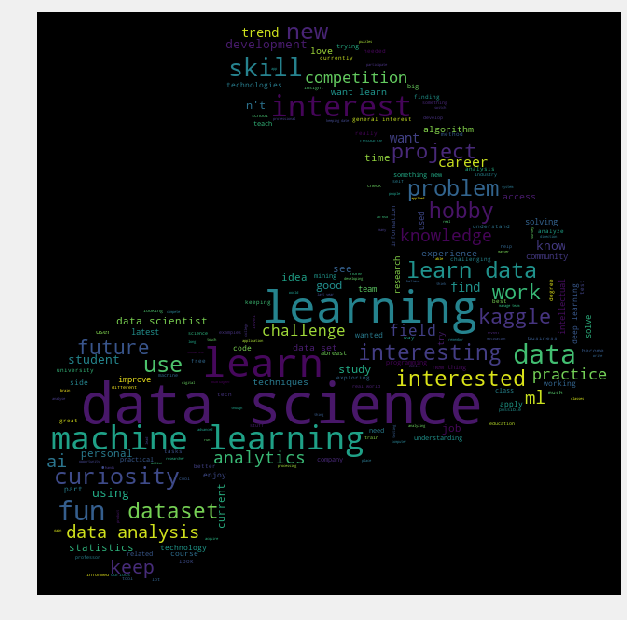

In [135]:
motivation=free['KaggleMotivationFreeForm'].dropna().apply(nltk.word_tokenize)
motivate=[]
for i in motivation:
    motivate.extend(i)
motivate=pd.Series(motivate)
motivate=([i for i in motivate.str.lower() if i not in stop_words])
f1=open("kaggle.png", "wb")
f1.write(codecs.decode(kaggle,'base64'))
f1.close()
img1 = imread("kaggle.png")
hcmask1 = img1
wc = WordCloud(background_color="black", max_words=4000, mask=hcmask1, 
               stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)
wc.generate(" ".join(motivate))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [150]:
from wordcloud import (WordCloud, get_single_color_func)

#PS : Credits to Andreas Mueller, creator of wordcloud, for the following code of the class 'GroupedColorFunc'.
#He made the code fully public for people who want to use specific color for specific words and made an example.
#Source link : https://amueller.github.io/word_cloud/auto_examples/colored_by_group.html#sphx-glr-auto-examples-colored-by-group-py

class GroupedColorFunc(object):

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

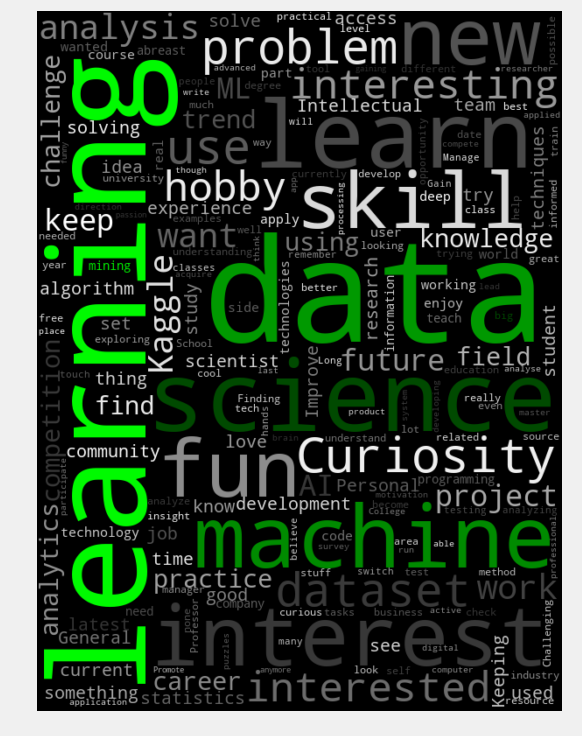

In [152]:
text = free[pd.notnull(free["KaggleMotivationFreeForm"])]["KaggleMotivationFreeForm"]

wc = WordCloud(collocations=False,height=800, width=600,  relative_scaling=0.2,random_state=74364).generate(" ".join(text))

color_to_words = {
    # words below will be colored with a green single color function
    '#00ff00': ['data', 'science', 'mining', 'big',
                'bigdata', 'machine', 'learning']
}

# Words that are not in any of the color_to_words values will be colored with grey
default_color = 'grey'

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)

# Plot
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off");

In [136]:
free.head()

,GenderFreeForm,KaggleMotivationFreeForm,CurrentJobTitleFreeForm,MLToolNextYearFreeForm,MLMethodNextYearFreeForm,LanguageRecommendationFreeForm,PublicDatasetsFreeForm,PersonalProjectsChallengeFreeForm,LearningPlatformCommunityFreeForm,LearningPlatformFreeForm1,...,WorkMethodsFrequencySelect2FreeForm,WorkMethodsFrequencySelect3FreeForm,TimeOtherSelectFreeForm,WorkChallengesFreeForm,WorkChallengeFrequencyOtherFreeForm,WorkMLTeamSeatFreeForm,WorkDataStorageFreeForm,WorkCodeSharingFreeForm,SalaryChangeFreeForm,JobSearchResourceFreeForm
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data manipulation,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I can't find time to practice consistently,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,teacher,NaN,NaN,NaN,NaN,NaN,NaN,Meetups,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Connectivity/data fusion,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
library=free['WorkLibrariesFreeForm'].dropna().apply(nltk.word_tokenize)
lib=[]
for i in library:
    lib.extend(i)
lib=pd.Series(lib)
lib=([i for i in lib.str.lower() if i not in stop_words])
lib=pd.Series(lib)
lib=lib.value_counts().reset_index()
lib.loc[lib['index'].str.contains('Pandas|pandas|panda'),'index']='Pandas'
lib.loc[lib['index'].str.contains('Tensorflow|tensorflow|tf|tensor'),'index']='Tensorflow'
lib.loc[lib['index'].str.contains('Scikit|scikit|sklearn'),'index']='Sklearn'
lib=lib.groupby('index')[0].sum().sort_values(ascending=False).to_frame()
R_packages=['dplyr','tidyr','ggplot2','caret','randomforest','shiny','R markdown','ggmap','leaflet','ggvis','stringr','tidyverse','plotly']
Py_packages=['Pandas','Tensorflow','Sklearn','matplotlib','numpy','scipy','seaborn','keras','xgboost','nltk','plotly']


In [138]:
py_pkgs=lib[lib.index.isin(Py_packages)].sort_values(by=0,ascending=True)
#ax[0].set_title('Most Frequently Used Py Libraries')
r_pkgs=lib[lib.index.isin(R_packages)].sort_values(by=0,ascending=True)
#ax[1].set_title('Most Frequently Used R Libraries')

In [144]:
trace1 = go.Bar(y=py_pkgs.index,x=py_pkgs[0].values,marker=dict(color = py_pkgs[0].values,),orientation='h')
trace2 = go.Bar(y=r_pkgs.index,x=r_pkgs[0].values,marker=dict(color = r_pkgs[0].values,),orientation='h')

fig = tls.make_subplots(rows=1, cols=2, subplot_titles=('Python Libraries','R Libraries'))
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

fig['layout'].update(height=400, width=1000, title='Most Popular Libraries',margin=go.Margin(l=100))
py.iplot(fig, filename='mlm-mlt')


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



Some brief information about the libraries:

Python:
1) Sklearn- For Machine Learning algorithms. This library has almost all the important machine learning algorithms used for industries.

2) Pandas, Matlotlib & Seaborn- Mostly used together for analytics and visualisation work.

3) TensorFlow and Keras- Used for Deep Learning.

4) Numpy and Scipy- Used for scientific computations.

5) nltk- Used for Natural Language Processing.

R:
1) dplyr- dplyr is the package for fast data manipulation.

2) ggplot2 and shiny- R's famous package for making beautiful graphics. Python visuals are nowhere near to the quality of visuals created using this library.

3) caret and randomforest- For Machine Learning purpose.

4) tidyr- Tools for changing the layout of your data sets.

5) stringr- Easy to learn tools for regular expressions and character strings.

Leaflet (folium in Python) and Plotly are common libraries in both languages, and are used to create interactive plots like geomaps, etc.